 * 미세먼지 농도와 기온간의 상관관계 분석

* 라이브러리 호출

In [1]:
%run my_init.py

In [2]:
%matplotlib inline

* 2020년~2022년 연도별 일평균 대기환경 정보(기간별_일평균_대기환경_정보_2020년.csv)를 로드해 데이터프레임 생성
* 일평균 대기환경 정보는 서울 열린데이터 광장(http://data.seoul.go.kr)에서 제공하는 데이터
* 서울시 1월~12월까지의 대기환경 정보 데이터

In [3]:
seoul_air_2020 = pd.read_csv('기간별_일평균_대기환경_정보_2020년.csv', encoding='utf-8')
seoul_air_2020

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20200101,동남권,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,20200101,동남권,강동구,0.036,0.004,0.6,0.003,37.0,28.0
2,20200101,동북권,강북구,0.045,0.004,0.7,0.003,41.0,27.0
3,20200101,서남권,강서구,0.041,0.004,0.6,0.005,39.0,23.0
4,20200101,서남권,관악구,0.043,0.008,0.7,0.003,35.0,22.0
...,...,...,...,...,...,...,...,...,...
9145,20201231,도심권,용산구,0.019,0.015,0.4,0.003,35.0,10.0
9146,20201231,서북권,은평구,0.016,0.022,0.5,0.004,26.0,10.0
9147,20201231,도심권,종로구,0.016,0.022,0.5,0.003,28.0,13.0
9148,20201231,도심권,중구,0.017,0.020,0.4,0.003,29.0,13.0


In [4]:
seoul_air_2021 = pd.read_csv('기간별_일평균_대기환경_정보_2021년.csv', encoding='utf-8')
seoul_air_2021

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20210101,동남권,강남구,0.022,0.017,0.5,0.004,22.0,14.0
1,20210101,동남권,강동구,0.029,0.014,0.5,0.003,30.0,20.0
2,20210101,동북권,강북구,0.025,0.013,0.6,0.003,33.0,19.0
3,20210101,서남권,강서구,0.027,0.018,0.3,0.005,25.0,14.0
4,20210101,서남권,관악구,0.033,0.013,0.6,0.004,21.0,12.0
...,...,...,...,...,...,...,...,...,...
9120,20211231,도심권,용산구,0.012,0.028,0.3,0.003,25.0,8.0
9121,20211231,서북권,은평구,0.014,0.027,NaN,0.004,26.0,8.0
9122,20211231,도심권,종로구,0.012,0.032,0.3,0.003,23.0,6.0
9123,20211231,도심권,중구,0.013,0.033,0.3,0.003,20.0,7.0


In [5]:
seoul_air_2022 = pd.read_csv('기간별_일평균_대기환경_정보_2022년.csv', encoding='utf-8')
seoul_air_2022

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20220101,동남권,강남구,0.029,0.014,0.5,0.003,25,12
1,20220101,동남권,강동구,0.032,0.010,0.5,0.003,32,15
2,20220101,동북권,강북구,0.030,0.012,0.6,0.003,32,16
3,20220101,서남권,강서구,0.031,0.017,0.6,0.004,30,12
4,20220101,서남권,관악구,0.037,0.011,0.6,0.003,24,13
...,...,...,...,...,...,...,...,...,...
9120,20221231,도심권,용산구,0.042,0.006,0.8,0.004,43,34
9121,20221231,서북권,은평구,0.033,0.011,0.8,0.004,37,25
9122,20221231,도심권,종로구,0.049,0.007,0.9,0.004,48,40
9123,20221231,도심권,중구,0.051,0.012,0.9,0.004,48,43


* 미세먼지농도와 초미세먼지농도 컬럼명 변경

In [6]:
seoul_air_2020.rename(columns={'미세먼지농도(㎍/㎥)':'미세먼지농도','초미세먼지농도(㎍/㎥)':'초미세먼지농도'}, inplace=True)
seoul_air_2020.head()

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도,초미세먼지농도
0,20200101,동남권,강남구,0.037,0.003,0.7,0.003,31.0,23.0
1,20200101,동남권,강동구,0.036,0.004,0.6,0.003,37.0,28.0
2,20200101,동북권,강북구,0.045,0.004,0.7,0.003,41.0,27.0
3,20200101,서남권,강서구,0.041,0.004,0.6,0.005,39.0,23.0
4,20200101,서남권,관악구,0.043,0.008,0.7,0.003,35.0,22.0


In [7]:
seoul_air_2021.rename(columns={'미세먼지농도(㎍/㎥)':'미세먼지농도','초미세먼지농도(㎍/㎥)':'초미세먼지농도'}, inplace=True)
seoul_air_2021.head()

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도,초미세먼지농도
0,20210101,동남권,강남구,0.022,0.017,0.5,0.004,22.0,14.0
1,20210101,동남권,강동구,0.029,0.014,0.5,0.003,30.0,20.0
2,20210101,동북권,강북구,0.025,0.013,0.6,0.003,33.0,19.0
3,20210101,서남권,강서구,0.027,0.018,0.3,0.005,25.0,14.0
4,20210101,서남권,관악구,0.033,0.013,0.6,0.004,21.0,12.0


In [8]:
seoul_air_2022.rename(columns={'미세먼지(㎍/㎥)':'미세먼지농도','초미세먼지(㎍/㎥)':'초미세먼지농도'}, inplace=True)
seoul_air_2022.head()

,측정일시,권역명,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도,초미세먼지농도
0,20220101,동남권,강남구,0.029,0.014,0.5,0.003,25,12
1,20220101,동남권,강동구,0.032,0.010,0.5,0.003,32,15
2,20220101,동북권,강북구,0.030,0.012,0.6,0.003,32,16
3,20220101,서남권,강서구,0.031,0.017,0.6,0.004,30,12
4,20220101,서남권,관악구,0.037,0.011,0.6,0.003,24,13


* 측정일시, 미세먼지 농도, 초미세먼지농도를 제외한 컬럼 삭제

In [9]:
seoul_air_2020.drop(['권역명','측정소명','이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)','아황산가스농도(ppm)'], axis=1,inplace=True)
seoul_air_2020

,측정일시,미세먼지농도,초미세먼지농도
0,20200101,31.0,23.0
1,20200101,37.0,28.0
2,20200101,41.0,27.0
3,20200101,39.0,23.0
4,20200101,35.0,22.0
...,...,...,...
9145,20201231,35.0,10.0
9146,20201231,26.0,10.0
9147,20201231,28.0,13.0
9148,20201231,29.0,13.0


In [10]:
seoul_air_2021.drop(['권역명','측정소명','이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)','아황산가스농도(ppm)'], axis=1,inplace=True)
seoul_air_2021

,측정일시,미세먼지농도,초미세먼지농도
0,20210101,22.0,14.0
1,20210101,30.0,20.0
2,20210101,33.0,19.0
3,20210101,25.0,14.0
4,20210101,21.0,12.0
...,...,...,...
9120,20211231,25.0,8.0
9121,20211231,26.0,8.0
9122,20211231,23.0,6.0
9123,20211231,20.0,7.0


In [11]:
seoul_air_2022.drop(['권역명','측정소명','이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)','아황산가스농도(ppm)'], axis=1,inplace=True)
seoul_air_2022

,측정일시,미세먼지농도,초미세먼지농도
0,20220101,25,12
1,20220101,32,15
2,20220101,32,16
3,20220101,30,12
4,20220101,24,13
...,...,...,...
9120,20221231,43,34
9121,20221231,37,25
9122,20221231,48,40
9123,20221231,48,43


[seoul_air_2020]

* 측정일시 : int64
* 미세먼지농도 : float64
* 초미세먼지농도 : float64
* 리스트 길이 : 9150

[seoul_air_2021]

* 측정일시 : int64
* 미세먼지농도 : float64
* 초미세먼지농도 : float64
* 리스트 길이 : 9125

[seoul_air_2022]

* 측정일시 : int64
* 미세먼지농도 : int64
* 초미세먼지농도 : int64
* 리스트 길이 : 9125

In [12]:
seoul_air_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     9150 non-null   int64  
 1   미세먼지농도   9105 non-null   float64
 2   초미세먼지농도  9120 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 214.6 KB


In [13]:
len(seoul_air_2020)

9150

In [14]:
seoul_air_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     9125 non-null   int64  
 1   미세먼지농도   9078 non-null   float64
 2   초미세먼지농도  9082 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 214.0 KB


In [15]:
len(seoul_air_2021)

9125

In [16]:
seoul_air_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   측정일시     9125 non-null   int64
 1   미세먼지농도   9125 non-null   int64
 2   초미세먼지농도  9125 non-null   int64
dtypes: int64(3)
memory usage: 214.0 KB


In [17]:
len(seoul_air_2022)

9125

* 결측값 확인 후 미세먼지농도와 초미세먼지농도 두 컬럼 모두 결측값인 경우 삭제
* 결측값 처리 후 리스트 길이 (2022년 데이터는 결측값 존재하지않음)
* [seoul_air_2020] : 9137
* [seoul_air_2021] : 9100

In [18]:
seoul_air_2020.isna().sum()

측정일시        0
미세먼지농도     45
초미세먼지농도    30
dtype: int64

In [19]:
seoul_air_2021.isna().sum()

측정일시        0
미세먼지농도     47
초미세먼지농도    43
dtype: int64

In [20]:
seoul_air_2022.isna().sum()

측정일시       0
미세먼지농도     0
초미세먼지농도    0
dtype: int64

In [21]:
seoul_air_2020.dropna(thresh=2, inplace=True)
seoul_air_2020

,측정일시,미세먼지농도,초미세먼지농도
0,20200101,31.0,23.0
1,20200101,37.0,28.0
2,20200101,41.0,27.0
3,20200101,39.0,23.0
4,20200101,35.0,22.0
...,...,...,...
9145,20201231,35.0,10.0
9146,20201231,26.0,10.0
9147,20201231,28.0,13.0
9148,20201231,29.0,13.0


In [22]:
seoul_air_2021.dropna(thresh=2, inplace=True)
seoul_air_2021

,측정일시,미세먼지농도,초미세먼지농도
0,20210101,22.0,14.0
1,20210101,30.0,20.0
2,20210101,33.0,19.0
3,20210101,25.0,14.0
4,20210101,21.0,12.0
...,...,...,...
9120,20211231,25.0,8.0
9121,20211231,26.0,8.0
9122,20211231,23.0,6.0
9123,20211231,20.0,7.0


In [23]:
len(seoul_air_2020)

9137

In [24]:
len(seoul_air_2021)

9100

* 미세먼지농도와 초미세먼지농도의 기술통계정보 확인

In [25]:
seoul_air_2020.미세먼지농도.describe()

count    9105.000000
mean       35.119824
std        17.962304
min         3.000000
25%        22.000000
50%        33.000000
75%        46.000000
max       146.000000
Name: 미세먼지농도, dtype: float64

In [26]:
seoul_air_2020.초미세먼지농도.describe()

count    9120.000000
mean       20.698246
std        12.371154
min         1.000000
25%        12.000000
50%        18.000000
75%        27.000000
max        91.000000
Name: 초미세먼지농도, dtype: float64

In [27]:
seoul_air_2021.미세먼지농도.describe()

count    9078.000000
mean       37.899647
std        37.411182
min         3.000000
25%        20.000000
50%        30.000000
75%        44.000000
max       503.000000
Name: 미세먼지농도, dtype: float64

In [28]:
seoul_air_2021.초미세먼지농도.describe()

count    9082.000000
mean       19.774499
std        15.017943
min         1.000000
25%        10.000000
50%        16.000000
75%        24.000000
max       123.000000
Name: 초미세먼지농도, dtype: float64

In [29]:
seoul_air_2022.미세먼지농도.describe()

count    9125.000000
mean       32.884493
std        20.516683
min         0.000000
25%        21.000000
50%        29.000000
75%        40.000000
max       404.000000
Name: 미세먼지농도, dtype: float64

In [30]:
seoul_air_2022.초미세먼지농도.describe()

count    9125.000000
mean       18.265096
std        12.179525
min         0.000000
25%        10.000000
50%        16.000000
75%        23.000000
max       105.000000
Name: 초미세먼지농도, dtype: float64

* 박스플롯 시각화를 이용하여 이상값 확인

* 2020년 미세먼지농도 이상치 확인 결과 대략 80이상의 값들이 이상값으로 분류
* 2020년 초미세먼지농도 이상치 확인 결과 대략 50이상의 값들이 이상값으로 분류

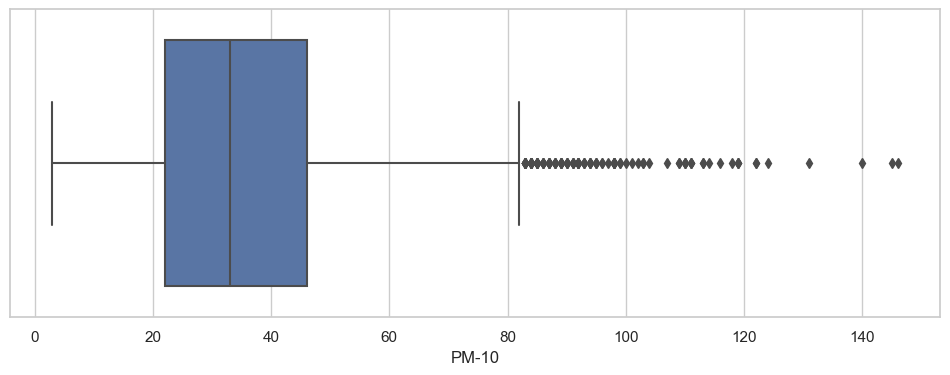

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_air_2020.미세먼지농도);
ax.set_xlabel('PM-10')
plt.show()

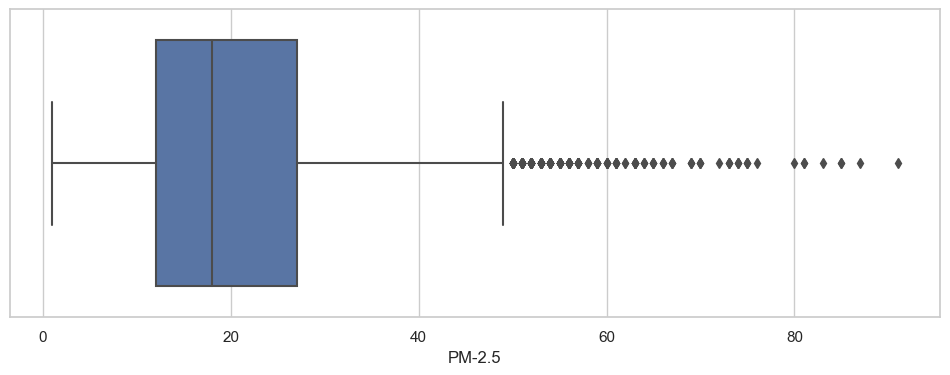

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax=sns.boxplot(x=seoul_air_2020.초미세먼지농도)
ax.set_xlabel('PM-2.5')
plt.show()

* 2021년 미세먼지농도 이상치 확인 결과 대략 90이상의 값들이 이상값으로 분류
* 2021년 초미세먼지농도 이상치 확인 결과 대략 45이상의 값들이 이상값으로 분류

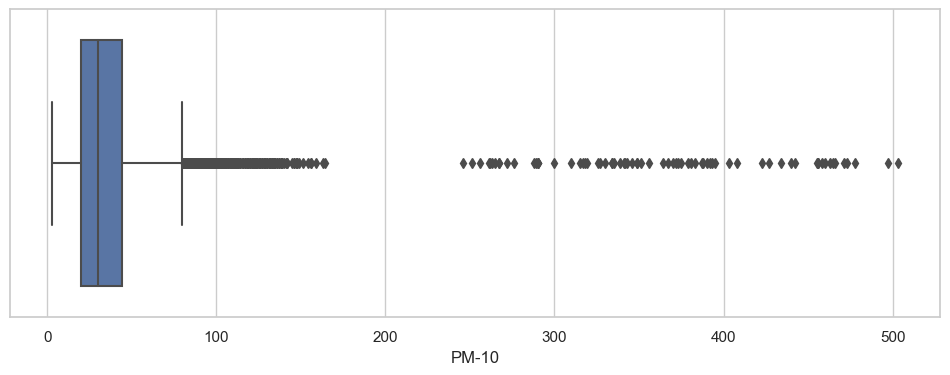

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_air_2021.미세먼지농도);
ax.set_xlabel('PM-10')
plt.show()

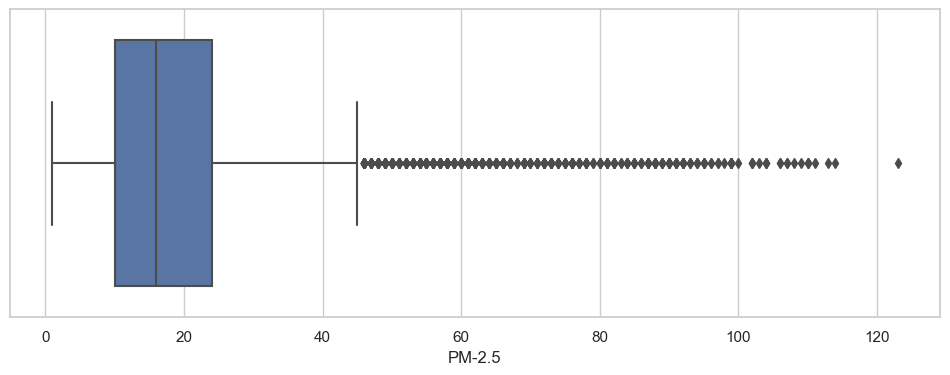

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_air_2021.초미세먼지농도);
ax.set_xlabel('PM-2.5')
plt.show()

* 2022년 미세먼지농도 이상치 확인 결과 대략 65이상의 값들이 이상값으로 분류
* 2022년 초미세먼지농도 이상치 확인 결과 대략 40이상의 값들이 이상값으로 분류

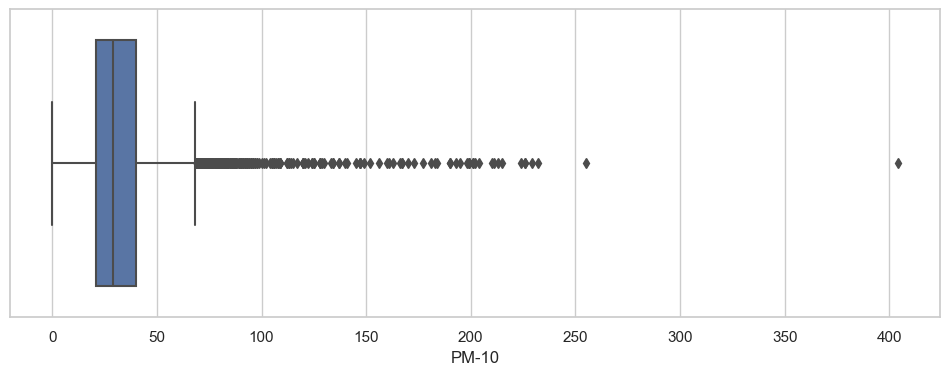

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_air_2022.미세먼지농도);
ax.set_xlabel('PM-10')
plt.show()

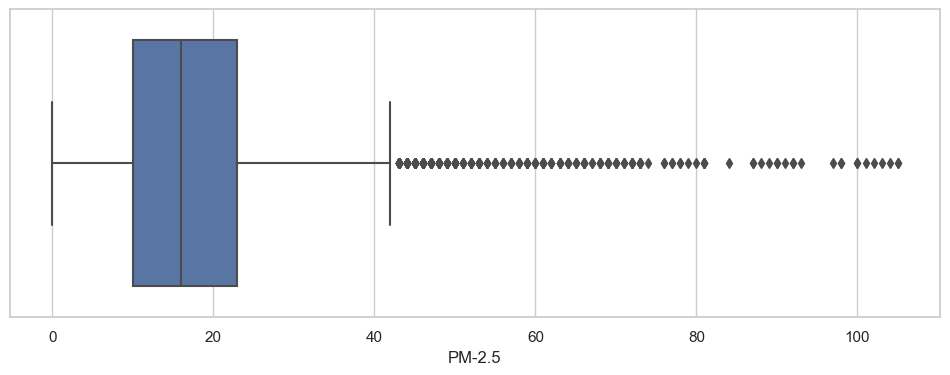

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_air_2022.초미세먼지농도);
ax.set_xlabel('PM-2.5')
plt.show()

* IQR기법을 이용하여 미세먼지농도와 초미세먼지농도의 이상값 확인

In [37]:
outliers, q1, q3, iqr, lfence, ufence = mfn.detect_outliers(seoul_air_2020, column = '미세먼지농도')
print(outliers)
print(q1, q3, iqr)
print(lfence, ufence)

[51, 53, 61, 68, 245, 428, 578, 586, 801, 1089, 1101, 1102, 1103, 1104, 1107, 1110, 1111, 1114, 1115, 1122, 1303, 1311, 1314, 1731, 1931, 2281, 2288, 2356, 2358, 2801, 2802, 2808, 2809, 2811, 2812, 2814, 2816, 2818, 2820, 2824, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3284, 3285, 3286, 3287, 3288, 3289, 3291, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 7501, 7506, 7514, 7523, 7776, 7777, 7778, 7781, 7782, 7786, 7788, 7789, 7796, 7797, 7798, 7820, 7926, 7928, 7939, 7943, 7948, 7953, 7968, 7978, 7993, 7998, 8003, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8647, 8648, 8649]
22.0 46.0 24.0
-14.0 82.0


In [38]:
outliers, q1, q3, iqr, lfence, ufence = mfn.detect_outliers(seoul_air_2020, column = '초미세먼지농도')
print(outliers)
print(q1, q3, iqr)
print(lfence, ufence)

[26, 51, 56, 57, 61, 62, 68, 73, 226, 227, 232, 233, 235, 236, 237, 240, 241, 243, 245, 247, 248, 451, 457, 461, 463, 468, 473, 576, 577, 580, 582, 583, 586, 587, 588, 589, 592, 593, 595, 596, 597, 598, 613, 620, 776, 777, 779, 780, 782, 783, 784, 786, 787, 788, 790, 791, 792, 793, 794, 795, 796, 797, 798, 800, 801, 802, 803, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 1076, 1078, 1079, 1080, 1081, 1082, 1083, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1120, 1121, 1122, 1123, 1124, 1126, 1131, 1132, 1133, 1136, 1137, 1139, 1141, 1143, 1144, 1146, 1148, 1273, 1276, 1277, 1281, 1283, 1287, 1288, 1298, 1681, 1689, 1693, 1701, 1706, 1714, 3456, 3464, 7337, 7501, 7505, 7506, 7514, 7518, 7519, 7523, 7925, 7926, 7928, 7930, 7931, 7932, 7937, 7939, 7940, 7943, 7944, 7948, 7949, 7953, 7956, 7

In [39]:
outliers, q1, q3, iqr, lfence, ufence = mfn.detect_outliers(seoul_air_2021, column = '미세먼지농도')
print(outliers)
print(q1, q3, iqr)
print(lfence, ufence)

[300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 313, 314, 315, 316, 317, 319, 320, 321, 322, 323, 324, 326, 333, 339, 345, 347, 348, 351, 352, 358, 364, 373, 789, 926, 927, 928, 932, 936, 939, 943, 947, 948, 949, 1051, 1052, 1053, 1054, 1056, 1057, 1061, 1062, 1064, 1068, 1069, 1072, 1073, 1075, 1076, 1078, 1079, 1081, 1082, 1083, 1085, 1086, 1087, 1089, 1090, 1092, 1093, 1094, 1097, 1098, 1099, 1100, 1101, 1103, 1104, 1105, 1106, 1107, 1110, 1111, 1112, 1114, 1115, 1117, 1118, 1119, 1120, 1122, 1123, 1124, 1137, 1143, 1289, 1298, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1751, 1753, 1801, 1802, 1803, 1814, 1815, 1818, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1830, 1831, 1833, 1835, 1839, 1840, 1841, 1843, 1844, 1846, 1847, 1848, 1849, 

In [40]:
outliers, q1, q3, iqr, lfence, ufence = mfn.detect_outliers(seoul_air_2021, column = '초미세먼지농도')
print(outliers)
print(q1, q3, iqr)
print(lfence, ufence)

[275, 276, 277, 280, 283, 284, 285, 286, 288, 289, 293, 297, 298, 300, 301, 302, 305, 306, 308, 309, 310, 313, 314, 316, 318, 322, 323, 789, 901, 909, 913, 921, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 946, 947, 948, 949, 1025, 1026, 1027, 1028, 1030, 1031, 1033, 1034, 1036, 1037, 1038, 1039, 1040, 1041, 1043, 1044, 1046, 1047, 1048, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1137, 1143, 1264, 1275, 1278, 1281, 1286, 1288, 1289, 1296, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716,

In [41]:
outliers, q1, q3, iqr, lfence, ufence = mfn.detect_outliers(seoul_air_2022, column = '미세먼지농도')
print(outliers)
print(q1, q3, iqr)
print(lfence, ufence)

[153, 157, 158, 161, 176, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 543, 551, 552, 553, 561, 568, 652, 653, 658, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1376, 1377, 1383, 1384, 1385, 1386, 1388, 1390, 1391, 1393, 1396, 1397, 1399, 1401, 1402, 1406, 1408, 1409, 1410, 1411, 1413, 1414, 1415, 1416, 1418, 1421, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1

In [42]:
outliers, q1, q3, iqr, lfence, ufence = mfn.detect_outliers(seoul_air_2022, column = '초미세먼지농도')
print(outliers)
print(q1, q3, iqr)
print(lfence, ufence)

[158, 160, 161, 167, 168, 176, 177, 180, 183, 184, 185, 193, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 528, 532, 533, 543, 544, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 564, 567, 568, 569, 570, 571, 572, 573, 574, 626, 630, 632, 636, 638, 639, 642, 643, 644, 645, 646, 647, 648, 651, 652, 655, 657, 658, 661, 668, 669, 670, 672, 673, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1083, 1086, 1093, 1375, 1376, 1377, 1378, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1391, 1393, 1394, 1396

* 그래프를 이용하여 미세먼지농도와 초미세먼지농도의 이상값의 범위 확인

In [43]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

<Figure size 1200x700 with 0 Axes>

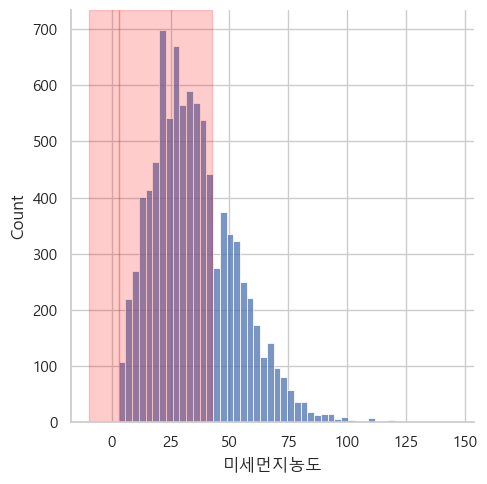

In [44]:
plt.figure(figsize=(12,7))
sns.displot(seoul_air_2020.미세먼지농도, bins=50, kde=False)
plt.axvspan(xmin = lfence, xmax = seoul_air_2020.미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = ufence, xmax = seoul_air_2020.미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.show()

<Figure size 1200x700 with 0 Axes>

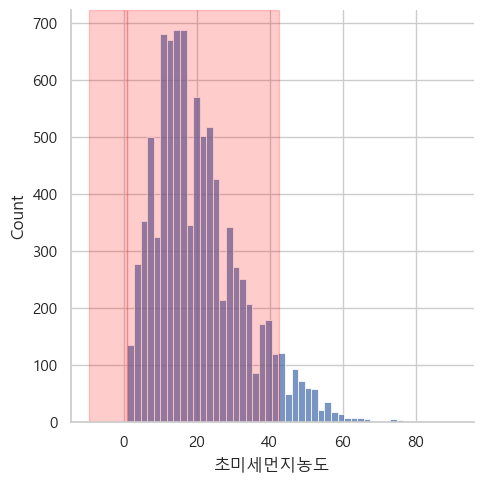

In [45]:
plt.figure(figsize=(12,7))
sns.displot(seoul_air_2020.초미세먼지농도, bins=50, kde=False)
plt.axvspan(xmin = lfence, xmax = seoul_air_2020.초미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = ufence, xmax = seoul_air_2020.초미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.show()

<Figure size 1200x700 with 0 Axes>

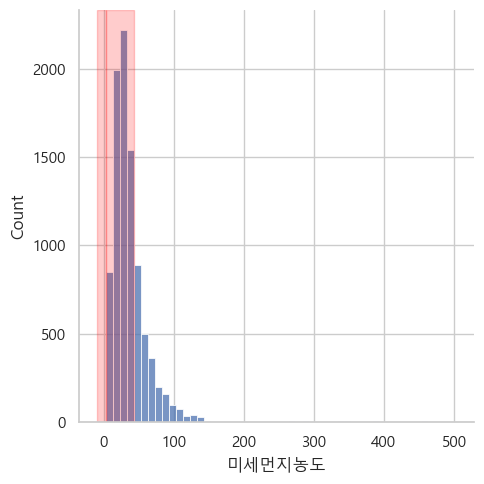

In [46]:
plt.figure(figsize=(12,7))
sns.displot(seoul_air_2021.미세먼지농도, bins=50, kde=False)
plt.axvspan(xmin = lfence, xmax = seoul_air_2021.미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = ufence, xmax = seoul_air_2021.미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.show()

<Figure size 1200x700 with 0 Axes>

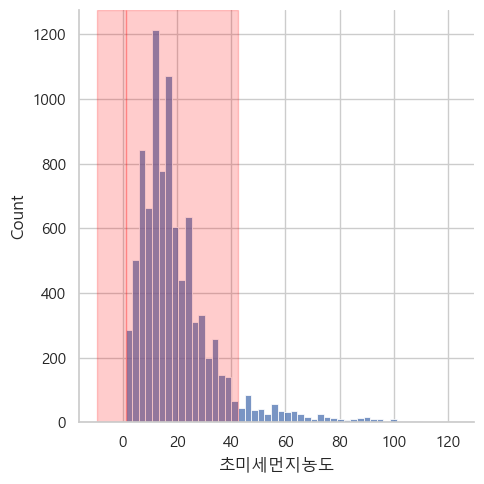

In [47]:
plt.figure(figsize=(12,7))
sns.displot(seoul_air_2021.초미세먼지농도, bins=50, kde=False)
plt.axvspan(xmin = lfence, xmax = seoul_air_2021.초미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = ufence, xmax = seoul_air_2021.초미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.show()

<Figure size 1200x700 with 0 Axes>

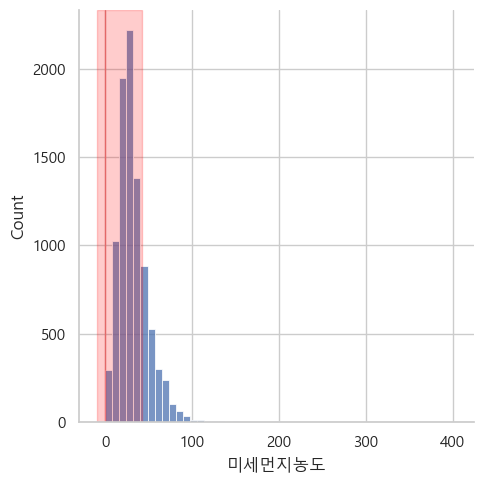

In [48]:
plt.figure(figsize=(12,7))
sns.displot(seoul_air_2022.미세먼지농도, bins=50, kde=False)
plt.axvspan(xmin = lfence, xmax = seoul_air_2022.미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = ufence, xmax = seoul_air_2022.미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.show()

<Figure size 1200x700 with 0 Axes>

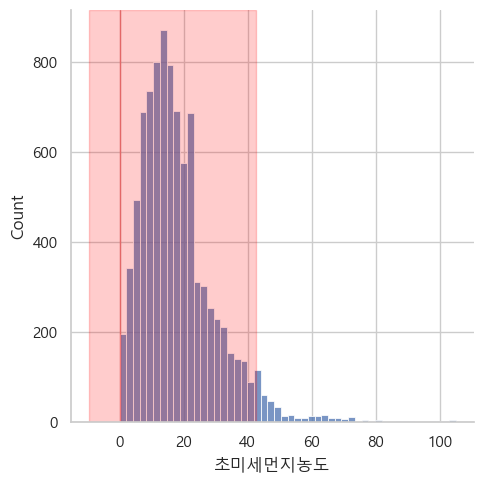

In [49]:
plt.figure(figsize=(12,7))
sns.displot(seoul_air_2022.초미세먼지농도, bins=50, kde=False)
plt.axvspan(xmin = lfence, xmax = seoul_air_2022.초미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.axvspan(xmin = ufence, xmax = seoul_air_2022.초미세먼지농도.min(), alpha = 0.2, color = 'red')
plt.show()

* 이상값 삭제한 데이터 프레임 생성
* 이상값 삭제 후 리스트 길이
* [air_2020_no_outlier] : 6346
* [air_2021_no_outlier] : 6605
* [air_2022_no_outlier] : 7118

In [50]:
air_2020_no_outlier = seoul_air_2020[(seoul_air_2020['미세먼지농도'] < ufence)&(seoul_air_2020['미세먼지농도'] > lfence)]
air_2020_no_outlier

,측정일시,미세먼지농도,초미세먼지농도
0,20200101,31.0,23.0
1,20200101,37.0,28.0
2,20200101,41.0,27.0
3,20200101,39.0,23.0
4,20200101,35.0,22.0
...,...,...,...
9145,20201231,35.0,10.0
9146,20201231,26.0,10.0
9147,20201231,28.0,13.0
9148,20201231,29.0,13.0


In [51]:
len(air_2020_no_outlier)

6346

In [52]:
air_2021_no_outlier = seoul_air_2021[(seoul_air_2021['미세먼지농도'] < ufence)&(seoul_air_2021['미세먼지농도'] > lfence)]
air_2021_no_outlier

,측정일시,미세먼지농도,초미세먼지농도
0,20210101,22.0,14.0
1,20210101,30.0,20.0
2,20210101,33.0,19.0
3,20210101,25.0,14.0
4,20210101,21.0,12.0
...,...,...,...
9120,20211231,25.0,8.0
9121,20211231,26.0,8.0
9122,20211231,23.0,6.0
9123,20211231,20.0,7.0


In [53]:
len(air_2021_no_outlier)

6605

In [54]:
air_2022_no_outlier = seoul_air_2022[(seoul_air_2022['미세먼지농도'] < ufence)&(seoul_air_2022['미세먼지농도'] > lfence)]
air_2022_no_outlier

,측정일시,미세먼지농도,초미세먼지농도
0,20220101,25,12
1,20220101,32,15
2,20220101,32,16
3,20220101,30,12
4,20220101,24,13
...,...,...,...
9112,20221231,41,35
9113,20221231,41,29
9114,20221231,41,30
9119,20221231,40,27


In [55]:
len(air_2022_no_outlier)

7118

[air_2020_no_outlier]
* 측정일시 : int64
* 미세먼지농도 : float64
* 초미세먼지농도 : float64

[air_2021_no_outlier]
* 측정일시 : int64
* 미세먼지농도 : float64
* 초미세먼지농도 : float64

[air_2022_no_outlier]
* 측정일시 : int64
* 미세먼지농도 : int64
* 초미세먼지농도 : int64

In [56]:
air_2020_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6346 entries, 0 to 9149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     6346 non-null   int64  
 1   미세먼지농도   6346 non-null   float64
 2   초미세먼지농도  6330 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 198.3 KB


In [57]:
air_2021_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6605 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     6605 non-null   int64  
 1   미세먼지농도   6605 non-null   float64
 2   초미세먼지농도  6589 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 206.4 KB


In [58]:
air_2022_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 9121
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   측정일시     7118 non-null   int64
 1   미세먼지농도   7118 non-null   int64
 2   초미세먼지농도  7118 non-null   int64
dtypes: int64(3)
memory usage: 222.4 KB


* [air_2022_no_outlier] 데이터의 미세먼지농도와 초미세먼지농도의 데이터타입을  숫자형 정수 int 64에서 다른 데이터와 동일하게 숫자형 실수 float64 로 변환

In [59]:
air_2022_no_outlier['미세먼지농도'] = pd.to_numeric(air_2022_no_outlier['미세먼지농도'])
air_2022_no_outlier['초미세먼지농도'] = pd.to_numeric(air_2022_no_outlier['초미세먼지농도'])

In [60]:
air_2020_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6346 entries, 0 to 9149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   측정일시     6346 non-null   int64  
 1   미세먼지농도   6346 non-null   float64
 2   초미세먼지농도  6330 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 198.3 KB


* 측정일시에서 월 데이터를 추출하기 위해 데이터타입을 숫자형 int64에서 날짜시간형 datetime으로 변환

In [61]:
air_2020_no_outlier['측정일시'] = pd.to_datetime(air_2020_no_outlier['측정일시'], format='%Y%m%d')

In [62]:
air_2020_no_outlier

,측정일시,미세먼지농도,초미세먼지농도
0,2020-01-01,31.0,23.0
1,2020-01-01,37.0,28.0
2,2020-01-01,41.0,27.0
3,2020-01-01,39.0,23.0
4,2020-01-01,35.0,22.0
...,...,...,...
9145,2020-12-31,35.0,10.0
9146,2020-12-31,26.0,10.0
9147,2020-12-31,28.0,13.0
9148,2020-12-31,29.0,13.0


In [63]:
air_2021_no_outlier['측정일시'] = pd.to_datetime(air_2021_no_outlier['측정일시'], format='%Y%m%d')

In [64]:
air_2021_no_outlier

,측정일시,미세먼지농도,초미세먼지농도
0,2021-01-01,22.0,14.0
1,2021-01-01,30.0,20.0
2,2021-01-01,33.0,19.0
3,2021-01-01,25.0,14.0
4,2021-01-01,21.0,12.0
...,...,...,...
9120,2021-12-31,25.0,8.0
9121,2021-12-31,26.0,8.0
9122,2021-12-31,23.0,6.0
9123,2021-12-31,20.0,7.0


In [65]:
air_2022_no_outlier['측정일시'] = pd.to_datetime(air_2022_no_outlier['측정일시'], format='%Y%m%d')

In [66]:
air_2022_no_outlier

,측정일시,미세먼지농도,초미세먼지농도
0,2022-01-01,25,12
1,2022-01-01,32,15
2,2022-01-01,32,16
3,2022-01-01,30,12
4,2022-01-01,24,13
...,...,...,...
9112,2022-12-31,41,35
9113,2022-12-31,41,29
9114,2022-12-31,41,30
9119,2022-12-31,40,27


* 측정일시 컬럼의 데이터 타입이 datetime64로 변환되었는지 확인

In [67]:
air_2020_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6346 entries, 0 to 9149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   측정일시     6346 non-null   datetime64[ns]
 1   미세먼지농도   6346 non-null   float64       
 2   초미세먼지농도  6330 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 198.3 KB


In [68]:
air_2021_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6605 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   측정일시     6605 non-null   datetime64[ns]
 1   미세먼지농도   6605 non-null   float64       
 2   초미세먼지농도  6589 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 206.4 KB


In [69]:
air_2022_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 9121
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   측정일시     7118 non-null   datetime64[ns]
 1   미세먼지농도   7118 non-null   int64         
 2   초미세먼지농도  7118 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 222.4 KB


* 측정일시의 날짜에서 월 데이터만 추출하여 '월' 컬럼 생성

In [70]:
air_2020_no_outlier['월'] =  air_2020_no_outlier['측정일시'].dt.month
air_2020_no_outlier

,측정일시,미세먼지농도,초미세먼지농도,월
0,2020-01-01,31.0,23.0,1
1,2020-01-01,37.0,28.0,1
2,2020-01-01,41.0,27.0,1
3,2020-01-01,39.0,23.0,1
4,2020-01-01,35.0,22.0,1
...,...,...,...,...
9145,2020-12-31,35.0,10.0,12
9146,2020-12-31,26.0,10.0,12
9147,2020-12-31,28.0,13.0,12
9148,2020-12-31,29.0,13.0,12


In [71]:
air_2021_no_outlier['월'] =  air_2021_no_outlier['측정일시'].dt.month
air_2021_no_outlier

,측정일시,미세먼지농도,초미세먼지농도,월
0,2021-01-01,22.0,14.0,1
1,2021-01-01,30.0,20.0,1
2,2021-01-01,33.0,19.0,1
3,2021-01-01,25.0,14.0,1
4,2021-01-01,21.0,12.0,1
...,...,...,...,...
9120,2021-12-31,25.0,8.0,12
9121,2021-12-31,26.0,8.0,12
9122,2021-12-31,23.0,6.0,12
9123,2021-12-31,20.0,7.0,12


In [72]:
air_2022_no_outlier['월'] =  air_2022_no_outlier['측정일시'].dt.month
air_2022_no_outlier

,측정일시,미세먼지농도,초미세먼지농도,월
0,2022-01-01,25,12,1
1,2022-01-01,32,15,1
2,2022-01-01,32,16,1
3,2022-01-01,30,12,1
4,2022-01-01,24,13,1
...,...,...,...,...
9112,2022-12-31,41,35,12
9113,2022-12-31,41,29,12
9114,2022-12-31,41,30,12
9119,2022-12-31,40,27,12


* 월별 미세먼지농도와 초미세먼지농도의 평균 계산
* 평균 계산된 데이터프레임 생성 [air_2020][air_2021][air_2022]

In [73]:
air_2020 = air_2020_no_outlier.groupby(by='월').mean()
air_2020

,측정일시,미세먼지농도,초미세먼지농도
월,,,
1,2020-01-18 08:42:54.301676032,24.927374,16.485955
2,2020-02-16 13:33:03.673469440,26.702948,17.235828
3,2020-03-14 07:09:51.044776192,35.459701,18.419162
4,2020-04-18 14:43:53.248081920,31.892583,16.425641
5,2020-05-16 19:15:45.513866240,28.734095,16.122349
6,2020-06-18 09:57:30.622406656,28.580913,17.058091
7,2020-07-16 14:56:15.933609984,19.282158,12.190278
8,2020-08-16 01:36:30.884718336,22.072386,13.916555
9,2020-09-15 11:37:53.431241472,19.198932,10.718291


In [74]:
air_2021 = air_2021_no_outlier.groupby(by='월').mean()
air_2021

,측정일시,미세먼지농도,초미세먼지농도
월,,,
1,2021-01-15 04:15:13.432835584,27.576493,15.944030
2,2021-02-13 05:47:44.396284928,27.801858,15.699690
3,2021-03-11 22:02:33.191489280,27.900709,16.736655
4,2021-04-14 13:11:31.390728448,28.247241,14.149220
5,2021-05-16 16:50:11.406843904,25.328897,12.986692
6,2021-06-16 21:12:54.061433344,27.547782,16.308874
7,2021-07-15 20:07:06.954177792,22.936658,14.545209
8,2021-08-15 23:22:44.553686784,21.470893,12.884715
9,2021-09-15 12:47:44.411366912,14.312585,6.956463


In [75]:
air_2022 = air_2022_no_outlier.groupby(by='월').mean()
air_2022

,측정일시,미세먼지농도,초미세먼지농도
월,,,
1,2022-01-16 17:12:06.180257536,31.360515,18.660944
2,2022-02-13 09:42:38.490566144,30.155136,17.597484
3,2022-03-19 02:58:49.411764480,26.204793,13.625272
4,2022-04-13 11:28:18.113207552,25.267296,12.125786
5,2022-05-16 03:09:56.319018496,29.592025,14.564417
6,2022-06-15 06:45:26.213592320,21.395284,11.607490
7,2022-07-16 03:07:34.736841984,24.346053,15.656579
8,2022-08-16 00:00:00.000000000,19.503226,10.974194
9,2022-09-14 12:35:56.918687744,19.717546,9.292439


* 월별 컬럼에 연도를 추가하기 위해 인덱스를 컬럼에 추가

In [76]:
air_2020['월'] = air_2020.index
air_2020

,측정일시,미세먼지농도,초미세먼지농도,월
월,,,,
1,2020-01-18 08:42:54.301676032,24.927374,16.485955,1
2,2020-02-16 13:33:03.673469440,26.702948,17.235828,2
3,2020-03-14 07:09:51.044776192,35.459701,18.419162,3
4,2020-04-18 14:43:53.248081920,31.892583,16.425641,4
5,2020-05-16 19:15:45.513866240,28.734095,16.122349,5
6,2020-06-18 09:57:30.622406656,28.580913,17.058091,6
7,2020-07-16 14:56:15.933609984,19.282158,12.190278,7
8,2020-08-16 01:36:30.884718336,22.072386,13.916555,8
9,2020-09-15 11:37:53.431241472,19.198932,10.718291,9


In [77]:
air_2021['월'] = air_2021.index
air_2021

,측정일시,미세먼지농도,초미세먼지농도,월
월,,,,
1,2021-01-15 04:15:13.432835584,27.576493,15.944030,1
2,2021-02-13 05:47:44.396284928,27.801858,15.699690,2
3,2021-03-11 22:02:33.191489280,27.900709,16.736655,3
4,2021-04-14 13:11:31.390728448,28.247241,14.149220,4
5,2021-05-16 16:50:11.406843904,25.328897,12.986692,5
6,2021-06-16 21:12:54.061433344,27.547782,16.308874,6
7,2021-07-15 20:07:06.954177792,22.936658,14.545209,7
8,2021-08-15 23:22:44.553686784,21.470893,12.884715,8
9,2021-09-15 12:47:44.411366912,14.312585,6.956463,9


In [78]:
air_2022['월'] = air_2022.index
air_2022

,측정일시,미세먼지농도,초미세먼지농도,월
월,,,,
1,2022-01-16 17:12:06.180257536,31.360515,18.660944,1
2,2022-02-13 09:42:38.490566144,30.155136,17.597484,2
3,2022-03-19 02:58:49.411764480,26.204793,13.625272,3
4,2022-04-13 11:28:18.113207552,25.267296,12.125786,4
5,2022-05-16 03:09:56.319018496,29.592025,14.564417,5
6,2022-06-15 06:45:26.213592320,21.395284,11.607490,6
7,2022-07-16 03:07:34.736841984,24.346053,15.656579,7
8,2022-08-16 00:00:00.000000000,19.503226,10.974194,8
9,2022-09-14 12:35:56.918687744,19.717546,9.292439,9


* 연도를 나타내는 string문자를 월 컬럼의 월별 데이터 앞에 추가

In [79]:
air_2020['월'] = '2020-' + air_2020['월'].astype(str)
air_2020

,측정일시,미세먼지농도,초미세먼지농도,월
월,,,,
1,2020-01-18 08:42:54.301676032,24.927374,16.485955,2020-1
2,2020-02-16 13:33:03.673469440,26.702948,17.235828,2020-2
3,2020-03-14 07:09:51.044776192,35.459701,18.419162,2020-3
4,2020-04-18 14:43:53.248081920,31.892583,16.425641,2020-4
5,2020-05-16 19:15:45.513866240,28.734095,16.122349,2020-5
6,2020-06-18 09:57:30.622406656,28.580913,17.058091,2020-6
7,2020-07-16 14:56:15.933609984,19.282158,12.190278,2020-7
8,2020-08-16 01:36:30.884718336,22.072386,13.916555,2020-8
9,2020-09-15 11:37:53.431241472,19.198932,10.718291,2020-9


In [80]:
air_2021['월'] = '2021-' + air_2021['월'].astype(str)
air_2021

,측정일시,미세먼지농도,초미세먼지농도,월
월,,,,
1,2021-01-15 04:15:13.432835584,27.576493,15.944030,2021-1
2,2021-02-13 05:47:44.396284928,27.801858,15.699690,2021-2
3,2021-03-11 22:02:33.191489280,27.900709,16.736655,2021-3
4,2021-04-14 13:11:31.390728448,28.247241,14.149220,2021-4
5,2021-05-16 16:50:11.406843904,25.328897,12.986692,2021-5
6,2021-06-16 21:12:54.061433344,27.547782,16.308874,2021-6
7,2021-07-15 20:07:06.954177792,22.936658,14.545209,2021-7
8,2021-08-15 23:22:44.553686784,21.470893,12.884715,2021-8
9,2021-09-15 12:47:44.411366912,14.312585,6.956463,2021-9


In [81]:
air_2022['월'] = '2022-' + air_2022['월'].astype(str)
air_2022

,측정일시,미세먼지농도,초미세먼지농도,월
월,,,,
1,2022-01-16 17:12:06.180257536,31.360515,18.660944,2022-1
2,2022-02-13 09:42:38.490566144,30.155136,17.597484,2022-2
3,2022-03-19 02:58:49.411764480,26.204793,13.625272,2022-3
4,2022-04-13 11:28:18.113207552,25.267296,12.125786,2022-4
5,2022-05-16 03:09:56.319018496,29.592025,14.564417,2022-5
6,2022-06-15 06:45:26.213592320,21.395284,11.607490,2022-6
7,2022-07-16 03:07:34.736841984,24.346053,15.656579,2022-7
8,2022-08-16 00:00:00.000000000,19.503226,10.974194,2022-8
9,2022-09-14 12:35:56.918687744,19.717546,9.292439,2022-9


* 측정일시 컬럼 제거

In [82]:
air_2020.drop(['측정일시'], axis=1,inplace=True)
air_2020

,미세먼지농도,초미세먼지농도,월
월,,,
1,24.927374,16.485955,2020-1
2,26.702948,17.235828,2020-2
3,35.459701,18.419162,2020-3
4,31.892583,16.425641,2020-4
5,28.734095,16.122349,2020-5
6,28.580913,17.058091,2020-6
7,19.282158,12.190278,2020-7
8,22.072386,13.916555,2020-8
9,19.198932,10.718291,2020-9


In [83]:
air_2021.drop(['측정일시'], axis=1,inplace=True)
air_2021

,미세먼지농도,초미세먼지농도,월
월,,,
1,27.576493,15.944030,2021-1
2,27.801858,15.699690,2021-2
3,27.900709,16.736655,2021-3
4,28.247241,14.149220,2021-4
5,25.328897,12.986692,2021-5
6,27.547782,16.308874,2021-6
7,22.936658,14.545209,2021-7
8,21.470893,12.884715,2021-8
9,14.312585,6.956463,2021-9


In [84]:
air_2022.drop(['측정일시'], axis=1,inplace=True)
air_2022

,미세먼지농도,초미세먼지농도,월
월,,,
1,31.360515,18.660944,2022-1
2,30.155136,17.597484,2022-2
3,26.204793,13.625272,2022-3
4,25.267296,12.125786,2022-4
5,29.592025,14.564417,2022-5
6,21.395284,11.607490,2022-6
7,24.346053,15.656579,2022-7
8,19.503226,10.974194,2022-8
9,19.717546,9.292439,2022-9


* '월' 컬럼이 앞으로 오도록 컬럼순서 변경 후 [air_2020][air_2021][air_2022] 데이터프레임으로 저장

In [85]:
air_2020 = air_2020[['월', '미세먼지농도', '초미세먼지농도']]
air_2020

,월,미세먼지농도,초미세먼지농도
월,,,
1,2020-1,24.927374,16.485955
2,2020-2,26.702948,17.235828
3,2020-3,35.459701,18.419162
4,2020-4,31.892583,16.425641
5,2020-5,28.734095,16.122349
6,2020-6,28.580913,17.058091
7,2020-7,19.282158,12.190278
8,2020-8,22.072386,13.916555
9,2020-9,19.198932,10.718291


In [86]:
air_2021 = air_2021[['월', '미세먼지농도', '초미세먼지농도']]
air_2021

,월,미세먼지농도,초미세먼지농도
월,,,
1,2021-1,27.576493,15.944030
2,2021-2,27.801858,15.699690
3,2021-3,27.900709,16.736655
4,2021-4,28.247241,14.149220
5,2021-5,25.328897,12.986692
6,2021-6,27.547782,16.308874
7,2021-7,22.936658,14.545209
8,2021-8,21.470893,12.884715
9,2021-9,14.312585,6.956463


In [87]:
air_2022 = air_2022[['월', '미세먼지농도', '초미세먼지농도']]
air_2022

,월,미세먼지농도,초미세먼지농도
월,,,
1,2022-1,31.360515,18.660944
2,2022-2,30.155136,17.597484
3,2022-3,26.204793,13.625272
4,2022-4,25.267296,12.125786
5,2022-5,29.592025,14.564417
6,2022-6,21.395284,11.607490
7,2022-7,24.346053,15.656579
8,2022-8,19.503226,10.974194
9,2022-9,19.717546,9.292439


* 미세먼지농도와 초미세먼지농도의 컬럼명을 보기 쉽게 변경

In [88]:
air_2020.columns = ['월', '평균_미세먼지농도(㎍/㎥)','평균_초미세먼지농도(㎍/㎥)']
air_2020

,월,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,,
1,2020-1,24.927374,16.485955
2,2020-2,26.702948,17.235828
3,2020-3,35.459701,18.419162
4,2020-4,31.892583,16.425641
5,2020-5,28.734095,16.122349
6,2020-6,28.580913,17.058091
7,2020-7,19.282158,12.190278
8,2020-8,22.072386,13.916555
9,2020-9,19.198932,10.718291


In [89]:
air_2021.columns = ['월', '평균_미세먼지농도(㎍/㎥)','평균_초미세먼지농도(㎍/㎥)']
air_2021

,월,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,,
1,2021-1,27.576493,15.944030
2,2021-2,27.801858,15.699690
3,2021-3,27.900709,16.736655
4,2021-4,28.247241,14.149220
5,2021-5,25.328897,12.986692
6,2021-6,27.547782,16.308874
7,2021-7,22.936658,14.545209
8,2021-8,21.470893,12.884715
9,2021-9,14.312585,6.956463


In [90]:
air_2022.columns = ['월', '평균_미세먼지농도(㎍/㎥)','평균_초미세먼지농도(㎍/㎥)']
air_2022

,월,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,,
1,2022-1,31.360515,18.660944
2,2022-2,30.155136,17.597484
3,2022-3,26.204793,13.625272
4,2022-4,25.267296,12.125786
5,2022-5,29.592025,14.564417
6,2022-6,21.395284,11.607490
7,2022-7,24.346053,15.656579
8,2022-8,19.503226,10.974194
9,2022-9,19.717546,9.292439


* 연도와 월별 날짜를 저장한 '월' 컬럼을 인덱스로 설정

In [91]:
air_2020 = air_2020.set_index('월')
air_2020

,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,
2020-1,24.927374,16.485955
2020-2,26.702948,17.235828
2020-3,35.459701,18.419162
2020-4,31.892583,16.425641
2020-5,28.734095,16.122349
2020-6,28.580913,17.058091
2020-7,19.282158,12.190278
2020-8,22.072386,13.916555
2020-9,19.198932,10.718291


In [92]:
air_2021 = air_2021.set_index('월')
air_2021

,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,
2021-1,27.576493,15.944030
2021-2,27.801858,15.699690
2021-3,27.900709,16.736655
2021-4,28.247241,14.149220
2021-5,25.328897,12.986692
2021-6,27.547782,16.308874
2021-7,22.936658,14.545209
2021-8,21.470893,12.884715
2021-9,14.312585,6.956463


In [93]:
air_2022 = air_2022.set_index('월')
air_2022

,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,
2022-1,31.360515,18.660944
2022-2,30.155136,17.597484
2022-3,26.204793,13.625272
2022-4,25.267296,12.125786
2022-5,29.592025,14.564417
2022-6,21.395284,11.607490
2022-7,24.346053,15.656579
2022-8,19.503226,10.974194
2022-9,19.717546,9.292439


* 미세먼지농도의 단위를 소수점 아래 한자리까지 나타내도록 설정

In [94]:
air_2020 = air_2020.round(1)
air_2020

,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,
2020-1,24.9,16.5
2020-2,26.7,17.2
2020-3,35.5,18.4
2020-4,31.9,16.4
2020-5,28.7,16.1
2020-6,28.6,17.1
2020-7,19.3,12.2
2020-8,22.1,13.9
2020-9,19.2,10.7


In [95]:
air_2021 = air_2021.round(1)
air_2021

,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,
2021-1,27.6,15.9
2021-2,27.8,15.7
2021-3,27.9,16.7
2021-4,28.2,14.1
2021-5,25.3,13.0
2021-6,27.5,16.3
2021-7,22.9,14.5
2021-8,21.5,12.9
2021-9,14.3,7.0


In [96]:
air_2022 = air_2022.round(1)
air_2022

,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,
2022-1,31.4,18.7
2022-2,30.2,17.6
2022-3,26.2,13.6
2022-4,25.3,12.1
2022-5,29.6,14.6
2022-6,21.4,11.6
2022-7,24.3,15.7
2022-8,19.5,11.0
2022-9,19.7,9.3


* concat을 이용하여 [air_2020, air_2021, air_2022]데이터 병합
* 병합한 데이터프레임 [air_avg] 생성

In [97]:
air_avg = pd.concat([air_2020, air_2021, air_2022])
air_avg

,평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,
2020-1,24.9,16.5
2020-2,26.7,17.2
2020-3,35.5,18.4
2020-4,31.9,16.4
2020-5,28.7,16.1
2020-6,28.6,17.1
2020-7,19.3,12.2
2020-8,22.1,13.9
2020-9,19.2,10.7


* 2020년, 2021년, 2022년 일평균 기온정보(일평균기온_2020.csv)를 로드해 데이터프레임 생성
* 일평균기온 정보 기상청 기상자료개방포털(https://data.kma.go.kr)에서 제공하는는데이터
* 서울시 1월~12월 평균기온 데이터터

In [98]:
seoul_temp_2020 = pd.read_csv('일평균기온_2020.csv',encoding='utf-8')
seoul_temp_2020

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2020-01-01,-2.2,0.3,14:57,-6.5,0:01,6.8
1,108,서울,2020-01-02,1.0,3.8,15:00,-0.7,0:01,4.5
2,108,서울,2020-01-03,-0.1,4.6,15:47,-3.4,8:07,8.0
3,108,서울,2020-01-04,1.2,6.1,14:50,-2.8,5:12,8.9
4,108,서울,2020-01-05,1.3,6.6,14:53,-3.2,8:21,9.8
...,...,...,...,...,...,...,...,...,...
361,108,서울,2020-12-27,5.8,10.0,14:12,1.4,0:01,8.6
362,108,서울,2020-12-28,6.7,11.4,13:44,4.2,8:26,7.2
363,108,서울,2020-12-29,0.1,4.3,0:06,-6.2,23:56,10.5
364,108,서울,2020-12-30,-10.9,-6.2,0:01,-12.9,22:22,6.7


In [99]:
seoul_temp_2021 = pd.read_csv('일평균기온_2021.csv',encoding='utf-8')
seoul_temp_2021

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2021-01-01,-4.2,1.6,14:47,-9.8,5:11,11.4
1,108,서울,2021-01-02,-5.0,-1.4,13:46,-8.4,8:05,7.0
2,108,서울,2021-01-03,-5.6,-2.0,12:38,-9.1,5:36,7.1
3,108,서울,2021-01-04,-3.5,0.3,15:35,-8.4,6:56,8.7
4,108,서울,2021-01-05,-5.5,-2.1,0:01,-9.9,23:56,7.8
...,...,...,...,...,...,...,...,...,...
360,108,서울,2021-12-27,-7.6,-3.9,16:34,-12.9,1:23,9.0
361,108,서울,2021-12-28,-4.1,-0.9,16:00,-8.5,7:12,7.6
362,108,서울,2021-12-29,0.4,5.9,15:18,-3.8,1:54,9.7
363,108,서울,2021-12-30,-3.9,0.2,15:31,-6.8,7:14,7.0


In [100]:
seoul_temp_2022 = pd.read_csv('일평균기온_2022.csv',encoding='utf-8')
seoul_temp_2022

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2022-01-01,-4.3,2.3,15:44,-10.2,7:10,12.5
1,108,서울,2022-01-02,-1.3,3.0,15:51,-5.2,23:56,8.2
2,108,서울,2022-01-03,-1.9,2.5,15:42,-8.0,7:14,10.5
3,108,서울,2022-01-04,-2.5,1.0,14:45,-5.6,24:00:00,6.6
4,108,서울,2022-01-05,-2.8,1.9,15:18,-7.8,6:34,9.7
...,...,...,...,...,...,...,...,...,...
360,108,서울,2022-12-27,-2.6,3.3,15:15,-7.3,7:20,10.6
361,108,서울,2022-12-28,-3.3,0.1,14:53,-6.0,23:55,6.1
362,108,서울,2022-12-29,-2.9,2.1,15:22,-7.8,7:28,9.9
363,108,서울,2022-12-30,-1.8,2.3,13:54,-4.4,23:55,6.7


* '일시' 컬럼명을 '측정일시'로 변경

In [101]:
seoul_temp_2020.rename(columns={'일시':'측정일시'}, inplace=True)
seoul_temp_2020

,지점번호,지점명,측정일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2020-01-01,-2.2,0.3,14:57,-6.5,0:01,6.8
1,108,서울,2020-01-02,1.0,3.8,15:00,-0.7,0:01,4.5
2,108,서울,2020-01-03,-0.1,4.6,15:47,-3.4,8:07,8.0
3,108,서울,2020-01-04,1.2,6.1,14:50,-2.8,5:12,8.9
4,108,서울,2020-01-05,1.3,6.6,14:53,-3.2,8:21,9.8
...,...,...,...,...,...,...,...,...,...
361,108,서울,2020-12-27,5.8,10.0,14:12,1.4,0:01,8.6
362,108,서울,2020-12-28,6.7,11.4,13:44,4.2,8:26,7.2
363,108,서울,2020-12-29,0.1,4.3,0:06,-6.2,23:56,10.5
364,108,서울,2020-12-30,-10.9,-6.2,0:01,-12.9,22:22,6.7


In [102]:
seoul_temp_2021.rename(columns={'일시':'측정일시'}, inplace=True)
seoul_temp_2021

,지점번호,지점명,측정일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2021-01-01,-4.2,1.6,14:47,-9.8,5:11,11.4
1,108,서울,2021-01-02,-5.0,-1.4,13:46,-8.4,8:05,7.0
2,108,서울,2021-01-03,-5.6,-2.0,12:38,-9.1,5:36,7.1
3,108,서울,2021-01-04,-3.5,0.3,15:35,-8.4,6:56,8.7
4,108,서울,2021-01-05,-5.5,-2.1,0:01,-9.9,23:56,7.8
...,...,...,...,...,...,...,...,...,...
360,108,서울,2021-12-27,-7.6,-3.9,16:34,-12.9,1:23,9.0
361,108,서울,2021-12-28,-4.1,-0.9,16:00,-8.5,7:12,7.6
362,108,서울,2021-12-29,0.4,5.9,15:18,-3.8,1:54,9.7
363,108,서울,2021-12-30,-3.9,0.2,15:31,-6.8,7:14,7.0


In [103]:
seoul_temp_2022.rename(columns={'일시':'측정일시'}, inplace=True)
seoul_temp_2022

,지점번호,지점명,측정일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2022-01-01,-4.3,2.3,15:44,-10.2,7:10,12.5
1,108,서울,2022-01-02,-1.3,3.0,15:51,-5.2,23:56,8.2
2,108,서울,2022-01-03,-1.9,2.5,15:42,-8.0,7:14,10.5
3,108,서울,2022-01-04,-2.5,1.0,14:45,-5.6,24:00:00,6.6
4,108,서울,2022-01-05,-2.8,1.9,15:18,-7.8,6:34,9.7
...,...,...,...,...,...,...,...,...,...
360,108,서울,2022-12-27,-2.6,3.3,15:15,-7.3,7:20,10.6
361,108,서울,2022-12-28,-3.3,0.1,14:53,-6.0,23:55,6.1
362,108,서울,2022-12-29,-2.9,2.1,15:22,-7.8,7:28,9.9
363,108,서울,2022-12-30,-1.8,2.3,13:54,-4.4,23:55,6.7


* 측정일시 컬럼이 앞에 위치하도록 컬럼위치 변경

In [104]:
seoul_temp_2020 = seoul_temp_2020[['측정일시', '지점번호', '지점명','평균기온(℃)','최고기온(℃)', '최고기온시각', '최저기온(℃)', '최저기온시각','일교차']]
seoul_temp_2020

,측정일시,지점번호,지점명,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,2020-01-01,108,서울,-2.2,0.3,14:57,-6.5,0:01,6.8
1,2020-01-02,108,서울,1.0,3.8,15:00,-0.7,0:01,4.5
2,2020-01-03,108,서울,-0.1,4.6,15:47,-3.4,8:07,8.0
3,2020-01-04,108,서울,1.2,6.1,14:50,-2.8,5:12,8.9
4,2020-01-05,108,서울,1.3,6.6,14:53,-3.2,8:21,9.8
...,...,...,...,...,...,...,...,...,...
361,2020-12-27,108,서울,5.8,10.0,14:12,1.4,0:01,8.6
362,2020-12-28,108,서울,6.7,11.4,13:44,4.2,8:26,7.2
363,2020-12-29,108,서울,0.1,4.3,0:06,-6.2,23:56,10.5
364,2020-12-30,108,서울,-10.9,-6.2,0:01,-12.9,22:22,6.7


In [105]:
seoul_temp_2021 = seoul_temp_2021[['측정일시', '지점번호', '지점명','평균기온(℃)','최고기온(℃)', '최고기온시각', '최저기온(℃)', '최저기온시각','일교차']]
seoul_temp_2021

,측정일시,지점번호,지점명,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,2021-01-01,108,서울,-4.2,1.6,14:47,-9.8,5:11,11.4
1,2021-01-02,108,서울,-5.0,-1.4,13:46,-8.4,8:05,7.0
2,2021-01-03,108,서울,-5.6,-2.0,12:38,-9.1,5:36,7.1
3,2021-01-04,108,서울,-3.5,0.3,15:35,-8.4,6:56,8.7
4,2021-01-05,108,서울,-5.5,-2.1,0:01,-9.9,23:56,7.8
...,...,...,...,...,...,...,...,...,...
360,2021-12-27,108,서울,-7.6,-3.9,16:34,-12.9,1:23,9.0
361,2021-12-28,108,서울,-4.1,-0.9,16:00,-8.5,7:12,7.6
362,2021-12-29,108,서울,0.4,5.9,15:18,-3.8,1:54,9.7
363,2021-12-30,108,서울,-3.9,0.2,15:31,-6.8,7:14,7.0


In [106]:
seoul_temp_2022 = seoul_temp_2022[['측정일시', '지점번호', '지점명','평균기온(℃)','최고기온(℃)', '최고기온시각', '최저기온(℃)', '최저기온시각','일교차']]
seoul_temp_2022

,측정일시,지점번호,지점명,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,2022-01-01,108,서울,-4.3,2.3,15:44,-10.2,7:10,12.5
1,2022-01-02,108,서울,-1.3,3.0,15:51,-5.2,23:56,8.2
2,2022-01-03,108,서울,-1.9,2.5,15:42,-8.0,7:14,10.5
3,2022-01-04,108,서울,-2.5,1.0,14:45,-5.6,24:00:00,6.6
4,2022-01-05,108,서울,-2.8,1.9,15:18,-7.8,6:34,9.7
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,108,서울,-2.6,3.3,15:15,-7.3,7:20,10.6
361,2022-12-28,108,서울,-3.3,0.1,14:53,-6.0,23:55,6.1
362,2022-12-29,108,서울,-2.9,2.1,15:22,-7.8,7:28,9.9
363,2022-12-30,108,서울,-1.8,2.3,13:54,-4.4,23:55,6.7


* 측정일시와 평균기온을 제외한 컬럼은 삭제

In [107]:
seoul_temp_2020.drop(['지점번호', '지점명','최고기온(℃)','최고기온시각',	'최저기온(℃)',	'최저기온시각',	'일교차'], axis=1,inplace=True)
seoul_temp_2020

,측정일시,평균기온(℃)
0,2020-01-01,-2.2
1,2020-01-02,1.0
2,2020-01-03,-0.1
3,2020-01-04,1.2
4,2020-01-05,1.3
...,...,...
361,2020-12-27,5.8
362,2020-12-28,6.7
363,2020-12-29,0.1
364,2020-12-30,-10.9


In [108]:
seoul_temp_2021.drop(['지점번호', '지점명','최고기온(℃)','최고기온시각',	'최저기온(℃)',	'최저기온시각',	'일교차'], axis=1,inplace=True)
seoul_temp_2021

,측정일시,평균기온(℃)
0,2021-01-01,-4.2
1,2021-01-02,-5.0
2,2021-01-03,-5.6
3,2021-01-04,-3.5
4,2021-01-05,-5.5
...,...,...
360,2021-12-27,-7.6
361,2021-12-28,-4.1
362,2021-12-29,0.4
363,2021-12-30,-3.9


In [109]:
seoul_temp_2022.drop(['지점번호', '지점명','최고기온(℃)','최고기온시각',	'최저기온(℃)',	'최저기온시각',	'일교차'], axis=1,inplace=True)
seoul_temp_2022

,측정일시,평균기온(℃)
0,2022-01-01,-4.3
1,2022-01-02,-1.3
2,2022-01-03,-1.9
3,2022-01-04,-2.5
4,2022-01-05,-2.8
...,...,...
360,2022-12-27,-2.6
361,2022-12-28,-3.3
362,2022-12-29,-2.9
363,2022-12-30,-1.8


* 평균기온 컬럼명 변경

In [110]:
seoul_temp_2020.rename(columns={'평균기온(℃)':'평균기온'}, inplace=True)
seoul_temp_2020

,측정일시,평균기온
0,2020-01-01,-2.2
1,2020-01-02,1.0
2,2020-01-03,-0.1
3,2020-01-04,1.2
4,2020-01-05,1.3
...,...,...
361,2020-12-27,5.8
362,2020-12-28,6.7
363,2020-12-29,0.1
364,2020-12-30,-10.9


In [111]:
seoul_temp_2021.rename(columns={'평균기온(℃)':'평균기온'}, inplace=True)
seoul_temp_2021

,측정일시,평균기온
0,2021-01-01,-4.2
1,2021-01-02,-5.0
2,2021-01-03,-5.6
3,2021-01-04,-3.5
4,2021-01-05,-5.5
...,...,...
360,2021-12-27,-7.6
361,2021-12-28,-4.1
362,2021-12-29,0.4
363,2021-12-30,-3.9


In [112]:
seoul_temp_2022.rename(columns={'평균기온(℃)':'평균기온'}, inplace=True)
seoul_temp_2022

,측정일시,평균기온
0,2022-01-01,-4.3
1,2022-01-02,-1.3
2,2022-01-03,-1.9
3,2022-01-04,-2.5
4,2022-01-05,-2.8
...,...,...
360,2022-12-27,-2.6
361,2022-12-28,-3.3
362,2022-12-29,-2.9
363,2022-12-30,-1.8


[seoul_temp_2020]

* 측정일시 : object
* 평균기온 : float64
* 리스트 길이 : 366

[seoul_temp_2021]

* 측정일시 : object
* 평균기온 : float64
* 리스트 길이 : 365

[seoul_temp_2022]

* 측정일시 : object
* 평균기온 : float64
* 리스트 길이 : 365

In [113]:
seoul_temp_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    366 non-null    object 
 1   평균기온    366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [114]:
len(seoul_temp_2020)

366

In [115]:
seoul_temp_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    365 non-null    object 
 1   평균기온    365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [116]:
len(seoul_temp_2021)

365

In [117]:
seoul_temp_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    365 non-null    object 
 1   평균기온    365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [118]:
len(seoul_temp_2022)

365

* 결측값 확인 결과 결측값이 없는것으로 확인
* 별도 처리 과정 불필요

In [119]:
seoul_temp_2020.isna().sum()

측정일시    0
평균기온    0
dtype: int64

In [120]:
seoul_temp_2021.isna().sum()

측정일시    0
평균기온    0
dtype: int64

In [121]:
seoul_temp_2022.isna().sum()

측정일시    0
평균기온    0
dtype: int64

* 평균기온의 기술통계정보 확인

In [122]:
seoul_temp_2020.평균기온.describe()

count    366.000000
mean      13.271858
std        9.675890
min      -10.900000
25%        5.350000
50%       13.500000
75%       22.225000
max       30.200000
Name: 평균기온, dtype: float64

In [123]:
seoul_temp_2021.평균기온.describe()

count    365.000000
mean      13.752055
std       10.500360
min      -14.900000
25%        6.500000
50%       14.100000
75%       22.900000
max       31.700000
Name: 평균기온, dtype: float64

In [124]:
seoul_temp_2022.평균기온.describe()

count    365.000000
mean      13.296164
std       10.960037
min      -11.800000
25%        4.800000
50%       14.800000
75%       22.700000
max       30.900000
Name: 평균기온, dtype: float64

* 박스플롯 시각화를 이용하여 이상값 확인
* 확인 결과 이상값이 없는것으로 확인
* 별도 처리 과정 불필요

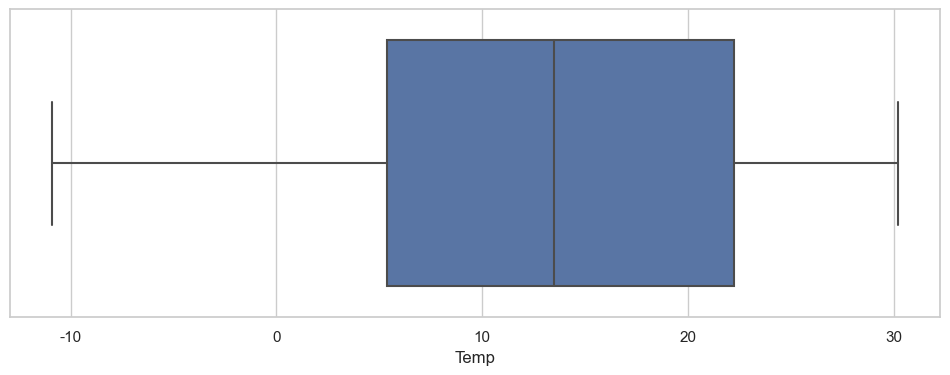

In [125]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_temp_2020.평균기온);
ax.set_xlabel('Temp')
plt.show()

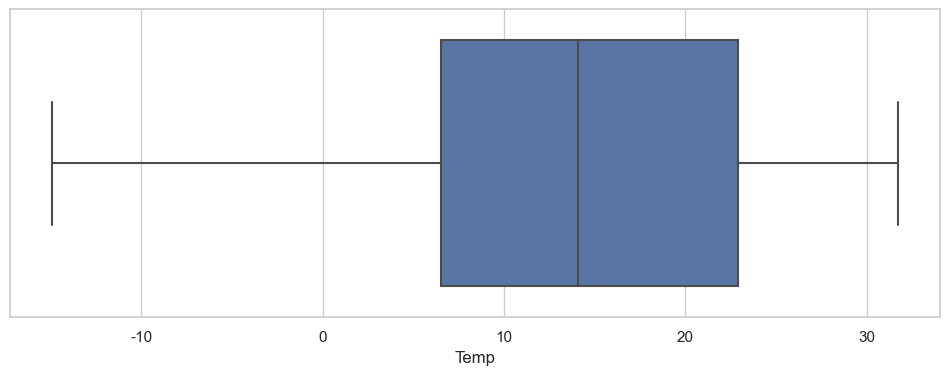

In [126]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_temp_2021.평균기온);
ax.set_xlabel('Temp')
plt.show()

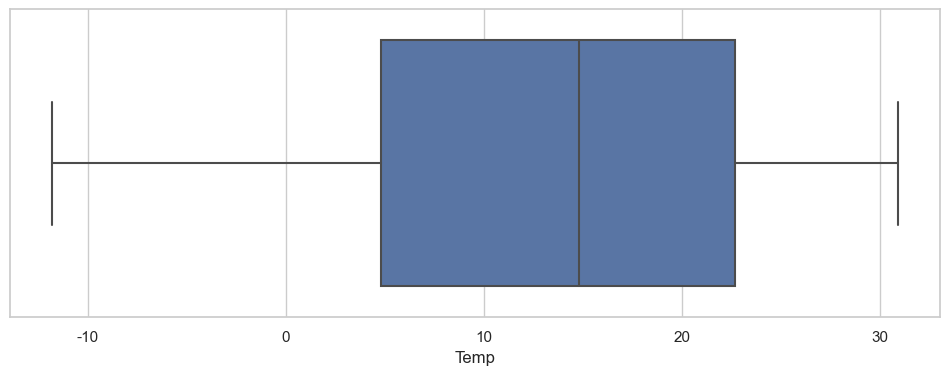

In [127]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,4))
ax = sns.boxplot(x=seoul_temp_2022.평균기온);
ax.set_xlabel('Temp')
plt.show()

* 측정일시에서 월 데이터를 추출하기 위해 데이터타입을 오브젝트 타입에서 날짜시간형 datetime으로 변환

In [128]:
seoul_temp_2020['측정일시'] = pd.to_datetime(seoul_temp_2020['측정일시'])

In [129]:
seoul_temp_2021['측정일시'] = pd.to_datetime(seoul_temp_2021['측정일시'])

In [130]:
seoul_temp_2022['측정일시'] = pd.to_datetime(seoul_temp_2022['측정일시'])

* 측정일시 컬럼의 데이터 타입이 datetime64로 변환된것 확인

In [131]:
seoul_temp_2020

,측정일시,평균기온
0,2020-01-01,-2.2
1,2020-01-02,1.0
2,2020-01-03,-0.1
3,2020-01-04,1.2
4,2020-01-05,1.3
...,...,...
361,2020-12-27,5.8
362,2020-12-28,6.7
363,2020-12-29,0.1
364,2020-12-30,-10.9


In [132]:
seoul_temp_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   측정일시    366 non-null    datetime64[ns]
 1   평균기온    366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [133]:
seoul_temp_2021

,측정일시,평균기온
0,2021-01-01,-4.2
1,2021-01-02,-5.0
2,2021-01-03,-5.6
3,2021-01-04,-3.5
4,2021-01-05,-5.5
...,...,...
360,2021-12-27,-7.6
361,2021-12-28,-4.1
362,2021-12-29,0.4
363,2021-12-30,-3.9


In [134]:
seoul_temp_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   측정일시    365 non-null    datetime64[ns]
 1   평균기온    365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [135]:
seoul_temp_2022

,측정일시,평균기온
0,2022-01-01,-4.3
1,2022-01-02,-1.3
2,2022-01-03,-1.9
3,2022-01-04,-2.5
4,2022-01-05,-2.8
...,...,...
360,2022-12-27,-2.6
361,2022-12-28,-3.3
362,2022-12-29,-2.9
363,2022-12-30,-1.8


In [136]:
seoul_temp_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   측정일시    365 non-null    datetime64[ns]
 1   평균기온    365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


* 측정일시의 날짜에서 월 데이터만 추출하여 '월' 컬럼 생성

In [137]:
seoul_temp_2020['월'] = seoul_temp_2020['측정일시'].dt.month
seoul_temp_2020

,측정일시,평균기온,월
0,2020-01-01,-2.2,1
1,2020-01-02,1.0,1
2,2020-01-03,-0.1,1
3,2020-01-04,1.2,1
4,2020-01-05,1.3,1
...,...,...,...
361,2020-12-27,5.8,12
362,2020-12-28,6.7,12
363,2020-12-29,0.1,12
364,2020-12-30,-10.9,12


In [138]:
seoul_temp_2021['월'] = seoul_temp_2021['측정일시'].dt.month
seoul_temp_2021

,측정일시,평균기온,월
0,2021-01-01,-4.2,1
1,2021-01-02,-5.0,1
2,2021-01-03,-5.6,1
3,2021-01-04,-3.5,1
4,2021-01-05,-5.5,1
...,...,...,...
360,2021-12-27,-7.6,12
361,2021-12-28,-4.1,12
362,2021-12-29,0.4,12
363,2021-12-30,-3.9,12


In [139]:
seoul_temp_2022['월'] = seoul_temp_2022['측정일시'].dt.month
seoul_temp_2022

,측정일시,평균기온,월
0,2022-01-01,-4.3,1
1,2022-01-02,-1.3,1
2,2022-01-03,-1.9,1
3,2022-01-04,-2.5,1
4,2022-01-05,-2.8,1
...,...,...,...
360,2022-12-27,-2.6,12
361,2022-12-28,-3.3,12
362,2022-12-29,-2.9,12
363,2022-12-30,-1.8,12


* 일별 평균기온의 평균 계산
* 평균 계산된 데이터프레임 생성 [temp_2020][temp_2021][temp_2022]

In [140]:
temp_2020 = seoul_temp_2020.groupby(by='월').mean()
temp_2020

,측정일시,평균기온
월,,
1,2020-01-16 00:00:00,1.625806
2,2020-02-15 00:00:00,2.534483
3,2020-03-16 00:00:00,7.735484
4,2020-04-15 12:00:00,11.123333
5,2020-05-16 00:00:00,18.006452
6,2020-06-15 12:00:00,23.886667
7,2020-07-16 00:00:00,24.145161
8,2020-08-16 00:00:00,26.519355
9,2020-09-15 12:00:00,21.393333


In [141]:
temp_2021 = seoul_temp_2021.groupby(by='월').mean()
temp_2021

,측정일시,평균기온
월,,
1,2021-01-16 00:00:00,-2.370968
2,2021-02-14 12:00:00,2.732143
3,2021-03-16 00:00:00,9.016129
4,2021-04-15 12:00:00,14.196667
5,2021-05-16 00:00:00,17.067742
6,2021-06-15 12:00:00,22.816667
7,2021-07-16 00:00:00,28.119355
8,2021-08-16 00:00:00,25.858065
9,2021-09-15 12:00:00,22.596667


In [142]:
temp_2022 = seoul_temp_2022.groupby(by='월').mean()
temp_2022

,측정일시,평균기온
월,,
1,2022-01-16 00:00:00,-2.196774
2,2022-02-14 12:00:00,-1.125000
3,2022-03-16 00:00:00,7.654839
4,2022-04-15 12:00:00,14.753333
5,2022-05-16 00:00:00,19.122581
6,2022-06-15 12:00:00,23.303333
7,2022-07-16 00:00:00,27.329032
8,2022-08-16 00:00:00,25.741935
9,2022-09-15 12:00:00,22.353333


* 월별 컬럼에 연도를 추가하기 위해 인덱스를 컬럼에 추가

In [143]:
temp_2020['월'] = temp_2020.index
temp_2020

,측정일시,평균기온,월
월,,,
1,2020-01-16 00:00:00,1.625806,1
2,2020-02-15 00:00:00,2.534483,2
3,2020-03-16 00:00:00,7.735484,3
4,2020-04-15 12:00:00,11.123333,4
5,2020-05-16 00:00:00,18.006452,5
6,2020-06-15 12:00:00,23.886667,6
7,2020-07-16 00:00:00,24.145161,7
8,2020-08-16 00:00:00,26.519355,8
9,2020-09-15 12:00:00,21.393333,9


In [144]:
temp_2021['월'] = temp_2021.index
temp_2021

,측정일시,평균기온,월
월,,,
1,2021-01-16 00:00:00,-2.370968,1
2,2021-02-14 12:00:00,2.732143,2
3,2021-03-16 00:00:00,9.016129,3
4,2021-04-15 12:00:00,14.196667,4
5,2021-05-16 00:00:00,17.067742,5
6,2021-06-15 12:00:00,22.816667,6
7,2021-07-16 00:00:00,28.119355,7
8,2021-08-16 00:00:00,25.858065,8
9,2021-09-15 12:00:00,22.596667,9


In [145]:
temp_2022['월'] = temp_2022.index
temp_2022

,측정일시,평균기온,월
월,,,
1,2022-01-16 00:00:00,-2.196774,1
2,2022-02-14 12:00:00,-1.125000,2
3,2022-03-16 00:00:00,7.654839,3
4,2022-04-15 12:00:00,14.753333,4
5,2022-05-16 00:00:00,19.122581,5
6,2022-06-15 12:00:00,23.303333,6
7,2022-07-16 00:00:00,27.329032,7
8,2022-08-16 00:00:00,25.741935,8
9,2022-09-15 12:00:00,22.353333,9


* 연도를 나타내는 string문자를 월 컬럼의 월별 데이터 앞에 추가

In [146]:
temp_2020['월'] = '2020-' + temp_2020['월'].astype(str)
temp_2020

,측정일시,평균기온,월
월,,,
1,2020-01-16 00:00:00,1.625806,2020-1
2,2020-02-15 00:00:00,2.534483,2020-2
3,2020-03-16 00:00:00,7.735484,2020-3
4,2020-04-15 12:00:00,11.123333,2020-4
5,2020-05-16 00:00:00,18.006452,2020-5
6,2020-06-15 12:00:00,23.886667,2020-6
7,2020-07-16 00:00:00,24.145161,2020-7
8,2020-08-16 00:00:00,26.519355,2020-8
9,2020-09-15 12:00:00,21.393333,2020-9


In [147]:
temp_2021['월'] = '2021-' + temp_2021['월'].astype(str)
temp_2021

,측정일시,평균기온,월
월,,,
1,2021-01-16 00:00:00,-2.370968,2021-1
2,2021-02-14 12:00:00,2.732143,2021-2
3,2021-03-16 00:00:00,9.016129,2021-3
4,2021-04-15 12:00:00,14.196667,2021-4
5,2021-05-16 00:00:00,17.067742,2021-5
6,2021-06-15 12:00:00,22.816667,2021-6
7,2021-07-16 00:00:00,28.119355,2021-7
8,2021-08-16 00:00:00,25.858065,2021-8
9,2021-09-15 12:00:00,22.596667,2021-9


In [148]:
temp_2022['월'] = '2022-' + temp_2022['월'].astype(str)
temp_2022

,측정일시,평균기온,월
월,,,
1,2022-01-16 00:00:00,-2.196774,2022-1
2,2022-02-14 12:00:00,-1.125000,2022-2
3,2022-03-16 00:00:00,7.654839,2022-3
4,2022-04-15 12:00:00,14.753333,2022-4
5,2022-05-16 00:00:00,19.122581,2022-5
6,2022-06-15 12:00:00,23.303333,2022-6
7,2022-07-16 00:00:00,27.329032,2022-7
8,2022-08-16 00:00:00,25.741935,2022-8
9,2022-09-15 12:00:00,22.353333,2022-9


* 측정일시 컬럼 제거 후 [air_2020][air_2021][air_2022] 데이터프레임으로 저장

In [149]:
temp_2020.drop(['측정일시'], axis = 1, inplace=True)
temp_2020

,평균기온,월
월,,
1,1.625806,2020-1
2,2.534483,2020-2
3,7.735484,2020-3
4,11.123333,2020-4
5,18.006452,2020-5
6,23.886667,2020-6
7,24.145161,2020-7
8,26.519355,2020-8
9,21.393333,2020-9


In [150]:
temp_2021.drop(['측정일시'], axis = 1, inplace=True)
temp_2021

,평균기온,월
월,,
1,-2.370968,2021-1
2,2.732143,2021-2
3,9.016129,2021-3
4,14.196667,2021-4
5,17.067742,2021-5
6,22.816667,2021-6
7,28.119355,2021-7
8,25.858065,2021-8
9,22.596667,2021-9


In [151]:
temp_2022.drop(['측정일시'], axis = 1, inplace=True)
temp_2022

,평균기온,월
월,,
1,-2.196774,2022-1
2,-1.125000,2022-2
3,7.654839,2022-3
4,14.753333,2022-4
5,19.122581,2022-5
6,23.303333,2022-6
7,27.329032,2022-7
8,25.741935,2022-8
9,22.353333,2022-9


* '월'컬럼이 앞으로 오도록 컬럼순서 변경

In [152]:
temp_2020 = temp_2020[['월', '평균기온']]
temp_2020

,월,평균기온
월,,
1,2020-1,1.625806
2,2020-2,2.534483
3,2020-3,7.735484
4,2020-4,11.123333
5,2020-5,18.006452
6,2020-6,23.886667
7,2020-7,24.145161
8,2020-8,26.519355
9,2020-9,21.393333


In [153]:
temp_2021 = temp_2021[['월', '평균기온']]
temp_2021

,월,평균기온
월,,
1,2021-1,-2.370968
2,2021-2,2.732143
3,2021-3,9.016129
4,2021-4,14.196667
5,2021-5,17.067742
6,2021-6,22.816667
7,2021-7,28.119355
8,2021-8,25.858065
9,2021-9,22.596667


In [154]:
temp_2022 = temp_2022[['월', '평균기온']]
temp_2022

,월,평균기온
월,,
1,2022-1,-2.196774
2,2022-2,-1.125000
3,2022-3,7.654839
4,2022-4,14.753333
5,2022-5,19.122581
6,2022-6,23.303333
7,2022-7,27.329032
8,2022-8,25.741935
9,2022-9,22.353333


* 평균기온의 컬럼명 변경

In [155]:
temp_2020.columns = ['월', '평균기온(℃)']
temp_2020

,월,평균기온(℃)
월,,
1,2020-1,1.625806
2,2020-2,2.534483
3,2020-3,7.735484
4,2020-4,11.123333
5,2020-5,18.006452
6,2020-6,23.886667
7,2020-7,24.145161
8,2020-8,26.519355
9,2020-9,21.393333


In [156]:
temp_2021.columns = ['월', '평균기온(℃)']
temp_2021

,월,평균기온(℃)
월,,
1,2021-1,-2.370968
2,2021-2,2.732143
3,2021-3,9.016129
4,2021-4,14.196667
5,2021-5,17.067742
6,2021-6,22.816667
7,2021-7,28.119355
8,2021-8,25.858065
9,2021-9,22.596667


In [157]:
temp_2022.columns = ['월', '평균기온(℃)']
temp_2022

,월,평균기온(℃)
월,,
1,2022-1,-2.196774
2,2022-2,-1.125000
3,2022-3,7.654839
4,2022-4,14.753333
5,2022-5,19.122581
6,2022-6,23.303333
7,2022-7,27.329032
8,2022-8,25.741935
9,2022-9,22.353333


* 연도와 월별 날짜를 저장한 '월' 컬럼을 인덱스로 설정

In [158]:
temp_2020 = temp_2020.set_index('월')
temp_2020

,평균기온(℃)
월,
2020-1,1.625806
2020-2,2.534483
2020-3,7.735484
2020-4,11.123333
2020-5,18.006452
2020-6,23.886667
2020-7,24.145161
2020-8,26.519355
2020-9,21.393333


In [159]:
temp_2021 = temp_2021.set_index('월')
temp_2021

,평균기온(℃)
월,
2021-1,-2.370968
2021-2,2.732143
2021-3,9.016129
2021-4,14.196667
2021-5,17.067742
2021-6,22.816667
2021-7,28.119355
2021-8,25.858065
2021-9,22.596667


In [160]:
temp_2022 = temp_2022.set_index('월')
temp_2022

,평균기온(℃)
월,
2022-1,-2.196774
2022-2,-1.125000
2022-3,7.654839
2022-4,14.753333
2022-5,19.122581
2022-6,23.303333
2022-7,27.329032
2022-8,25.741935
2022-9,22.353333


* 평균기온 단위를 소수점 아래 한자리까지 나타내도록 설정

In [161]:
temp_2020 = temp_2020.round(1)
temp_2020

,평균기온(℃)
월,
2020-1,1.6
2020-2,2.5
2020-3,7.7
2020-4,11.1
2020-5,18.0
2020-6,23.9
2020-7,24.1
2020-8,26.5
2020-9,21.4


In [162]:
temp_2021 = temp_2021.round(1)
temp_2021

,평균기온(℃)
월,
2021-1,-2.4
2021-2,2.7
2021-3,9.0
2021-4,14.2
2021-5,17.1
2021-6,22.8
2021-7,28.1
2021-8,25.9
2021-9,22.6


In [163]:
temp_2022 = temp_2022.round(1)
temp_2022

,평균기온(℃)
월,
2022-1,-2.2
2022-2,-1.1
2022-3,7.7
2022-4,14.8
2022-5,19.1
2022-6,23.3
2022-7,27.3
2022-8,25.7
2022-9,22.4


* concat을 이용하여 [temp_2020, temp_2021, temp_2022]데이터 병합
* 병합한 데이터프레임 [temp_avg] 생성

In [164]:
temp_avg = pd.concat([temp_2020, temp_2021, temp_2022])
temp_avg

,평균기온(℃)
월,
2020-1,1.6
2020-2,2.5
2020-3,7.7
2020-4,11.1
2020-5,18.0
2020-6,23.9
2020-7,24.1
2020-8,26.5
2020-9,21.4


* merge를 이용하여 [temp_avg]데이터와 [air_avg]를 월 인덱스를 기준으로 병합
* 병합한 데이터프레임 [seoul_data] 생성

In [165]:
seoul_data = pd.merge(temp_avg, air_avg, on='월')
seoul_data

,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,,
2020-1,1.6,24.9,16.5
2020-2,2.5,26.7,17.2
2020-3,7.7,35.5,18.4
2020-4,11.1,31.9,16.4
2020-5,18.0,28.7,16.1
2020-6,23.9,28.6,17.1
2020-7,24.1,19.3,12.2
2020-8,26.5,22.1,13.9
2020-9,21.4,19.2,10.7


* 인덱스명을 변경하기 위해 인덱스 해제

In [166]:
seoul_data.reset_index(inplace=True)
seoul_data

,월,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
0,2020-1,1.6,24.9,16.5
1,2020-2,2.5,26.7,17.2
2,2020-3,7.7,35.5,18.4
3,2020-4,11.1,31.9,16.4
4,2020-5,18.0,28.7,16.1
5,2020-6,23.9,28.6,17.1
6,2020-7,24.1,19.3,12.2
7,2020-8,26.5,22.1,13.9
8,2020-9,21.4,19.2,10.7
9,2020-10,14.3,26.2,12.9


* '월'컬럼을 '측정일자'로 변경 후 인덱스로 설정

In [167]:
seoul_data.rename(columns={'월':'측정일자'}, inplace=True)
seoul_data

,측정일자,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
0,2020-1,1.6,24.9,16.5
1,2020-2,2.5,26.7,17.2
2,2020-3,7.7,35.5,18.4
3,2020-4,11.1,31.9,16.4
4,2020-5,18.0,28.7,16.1
5,2020-6,23.9,28.6,17.1
6,2020-7,24.1,19.3,12.2
7,2020-8,26.5,22.1,13.9
8,2020-9,21.4,19.2,10.7
9,2020-10,14.3,26.2,12.9


In [168]:
seoul_data.set_index('측정일자', inplace=True)
seoul_data

,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
측정일자,,,
2020-1,1.6,24.9,16.5
2020-2,2.5,26.7,17.2
2020-3,7.7,35.5,18.4
2020-4,11.1,31.9,16.4
2020-5,18.0,28.7,16.1
2020-6,23.9,28.6,17.1
2020-7,24.1,19.3,12.2
2020-8,26.5,22.1,13.9
2020-9,21.4,19.2,10.7


* 인덱스를 제거한 데이터프레임 [s_data] 생성

In [169]:
s_data = seoul_data.reset_index()
s_data

,측정일자,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
0,2020-1,1.6,24.9,16.5
1,2020-2,2.5,26.7,17.2
2,2020-3,7.7,35.5,18.4
3,2020-4,11.1,31.9,16.4
4,2020-5,18.0,28.7,16.1
5,2020-6,23.9,28.6,17.1
6,2020-7,24.1,19.3,12.2
7,2020-8,26.5,22.1,13.9
8,2020-9,21.4,19.2,10.7
9,2020-10,14.3,26.2,12.9


* merge를 이용하여 연도별로 평균기온과 미세먼지농도 데이터 병합
* 병합한 데이터프레임 [seoul_2020][seoul_2021][seoul_2022] 생성

In [170]:
seoul_2020 = pd.merge(temp_2020, air_2020, on='월')
seoul_2020

,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,,
2020-1,1.6,24.9,16.5
2020-2,2.5,26.7,17.2
2020-3,7.7,35.5,18.4
2020-4,11.1,31.9,16.4
2020-5,18.0,28.7,16.1
2020-6,23.9,28.6,17.1
2020-7,24.1,19.3,12.2
2020-8,26.5,22.1,13.9
2020-9,21.4,19.2,10.7


In [171]:
seoul_2021 = pd.merge(temp_2021, air_2021, on='월')
seoul_2021

,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,,
2021-1,-2.4,27.6,15.9
2021-2,2.7,27.8,15.7
2021-3,9.0,27.9,16.7
2021-4,14.2,28.2,14.1
2021-5,17.1,25.3,13.0
2021-6,22.8,27.5,16.3
2021-7,28.1,22.9,14.5
2021-8,25.9,21.5,12.9
2021-9,22.6,14.3,7.0


In [172]:
seoul_2022 = pd.merge(temp_2022, air_2022, on='월')
seoul_2022

,평균기온(℃),평균_미세먼지농도(㎍/㎥),평균_초미세먼지농도(㎍/㎥)
월,,,
2022-1,-2.2,31.4,18.7
2022-2,-1.1,30.2,17.6
2022-3,7.7,26.2,13.6
2022-4,14.8,25.3,12.1
2022-5,19.1,29.6,14.6
2022-6,23.3,21.4,11.6
2022-7,27.3,24.3,15.7
2022-8,25.7,19.5,11.0
2022-9,22.4,19.7,9.3


In [173]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

* 월별 미세먼지농도와 초미세먼지농도의 추이를 라인그래프를 통해 확인

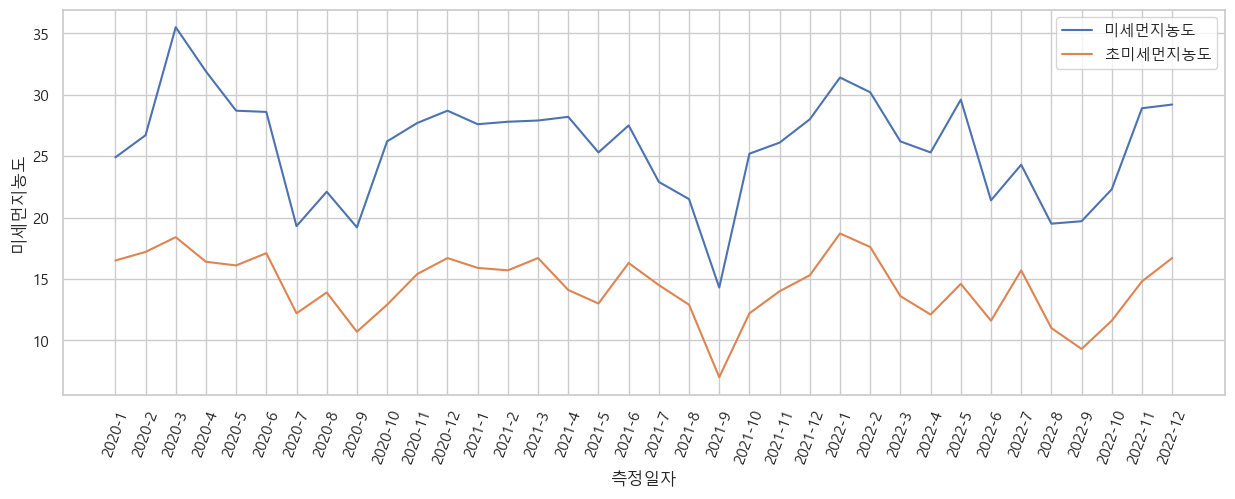

In [174]:
plt.figure(figsize=(15,5))
plt.plot(air_avg ,label=['미세먼지농도', '초미세먼지농도'])
plt.xlabel('측정일자')
plt.ylabel('미세먼지농도')
plt.legend()
plt.xticks(rotation=70)
plt.show()

* 월별 평균 기온 추이를 맷플롯립 데이터의 라인그래프를 통해 확인

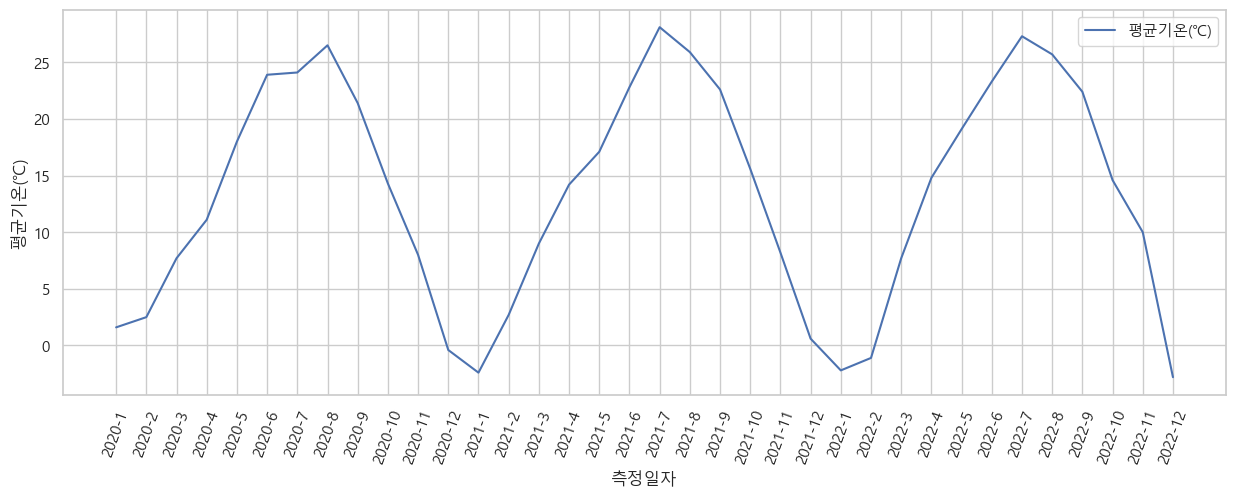

In [175]:
plt.figure(figsize=(15,5))
plt.plot(temp_avg, label='평균기온(℃)' )
plt.xlabel('측정일자')
plt.ylabel('평균기온(℃)')
plt.legend()
plt.xticks(rotation=70)
plt.show()

* 월별 미세먼지농도, 초미세먼지농도, 평균기온 추이를 시본데이터의 라인그래프를 통해 확인

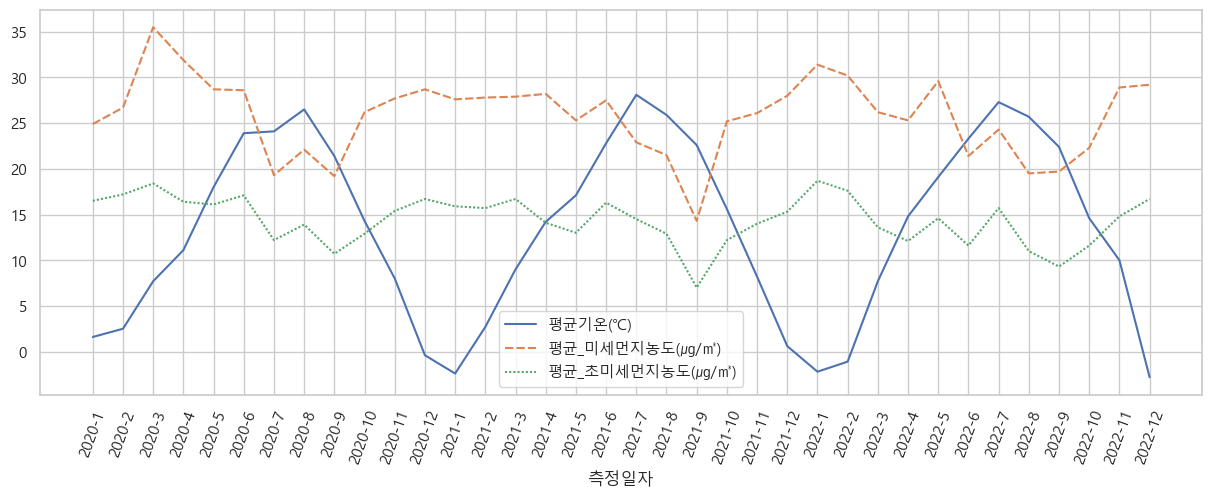

In [176]:
plt.figure(figsize=(15,5))
sns.lineplot(seoul_data)
plt.xticks(rotation=70)
plt.show()

* 시본 데이터의 산점도를 통해 평균기온별 미세먼지농도 분포를 확인
* 아래 그래프를 통해 대체로 기온이 높을 때 미세먼지농도가 낮고, 기온이 높을 때 미세먼지 농도가 높다는 사실 확인 가능

<Axes: xlabel='측정일자', ylabel='평균_미세먼지농도(㎍/㎥)'>

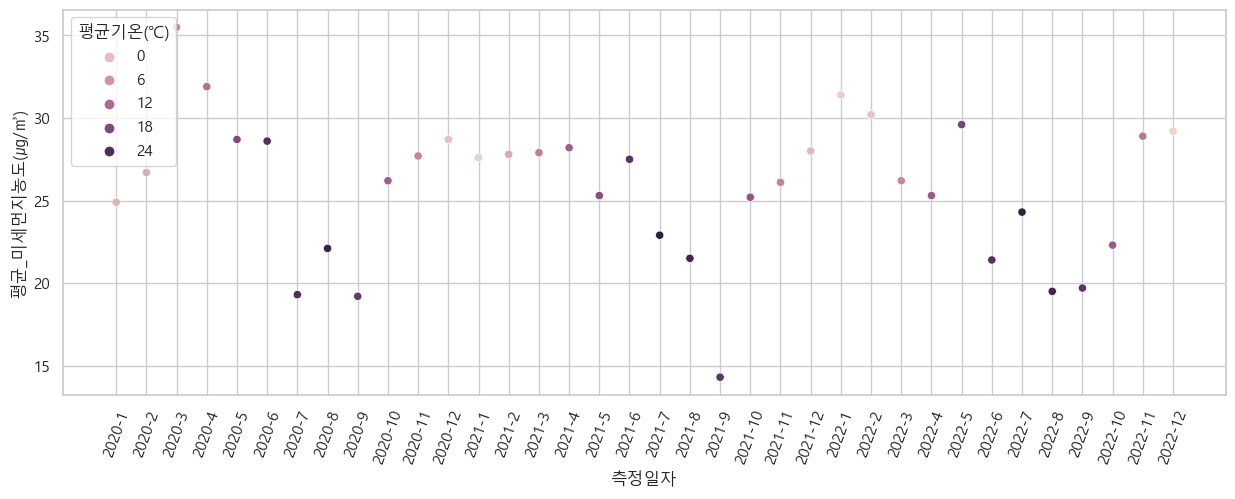

In [177]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=70)
sns.scatterplot(x= '측정일자', y='평균_미세먼지농도(㎍/㎥)',hue = '평균기온(℃)',data=seoul_data)

* 시본 데이터의 산점도를 통해 평균기온별 초미세먼지농도 분포를 확인
* 아래 그래프를 통해 기온과 관계없이 초미세먼지농도가 다양하게 분포하고 있음을 확인 가능

<Axes: xlabel='측정일자', ylabel='평균_초미세먼지농도(㎍/㎥)'>

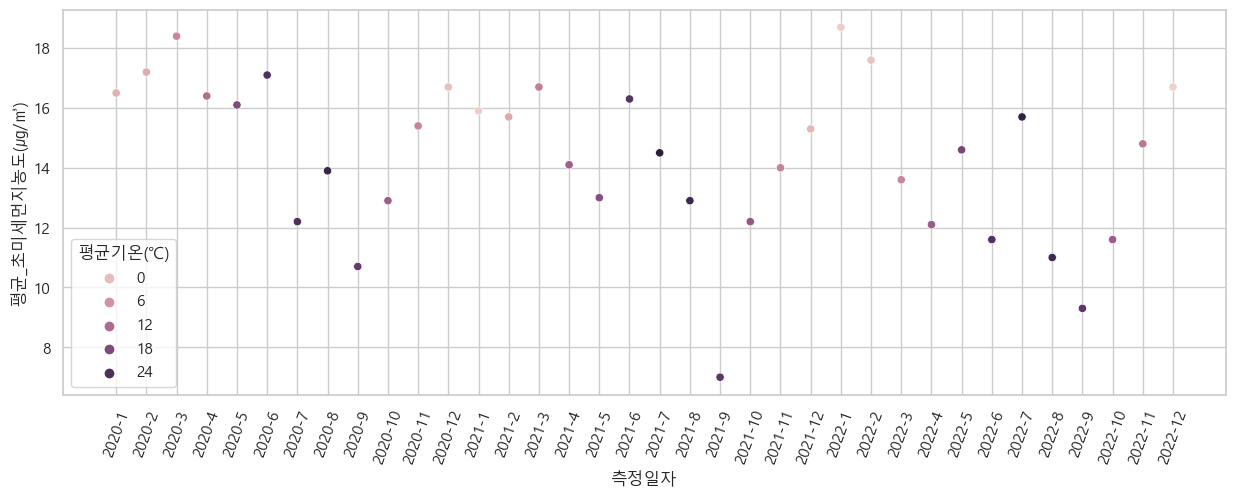

In [178]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=70)
sns.scatterplot(x= '측정일자', y='평균_초미세먼지농도(㎍/㎥)',hue = '평균기온(℃)',data=seoul_data)

* 연도별 평균기온과 미세먼지농도의 분포를 라인그래프를 통해 확인
* 아래 그래프를 통해 평균기온이 낮은 12월에서 3월 사이에는 대체로 미세먼지 농도가 높고, 평균기온이 높은 7월에서 9월 사이에는 대체로 미세먼지 농도가 낮은 사실 확인 가능(평균 기온이 높을 때 미세먼지농도가 높은경우와 평균기온이 낮을 때 미세먼지 농도가 낮은 경우도 있음)

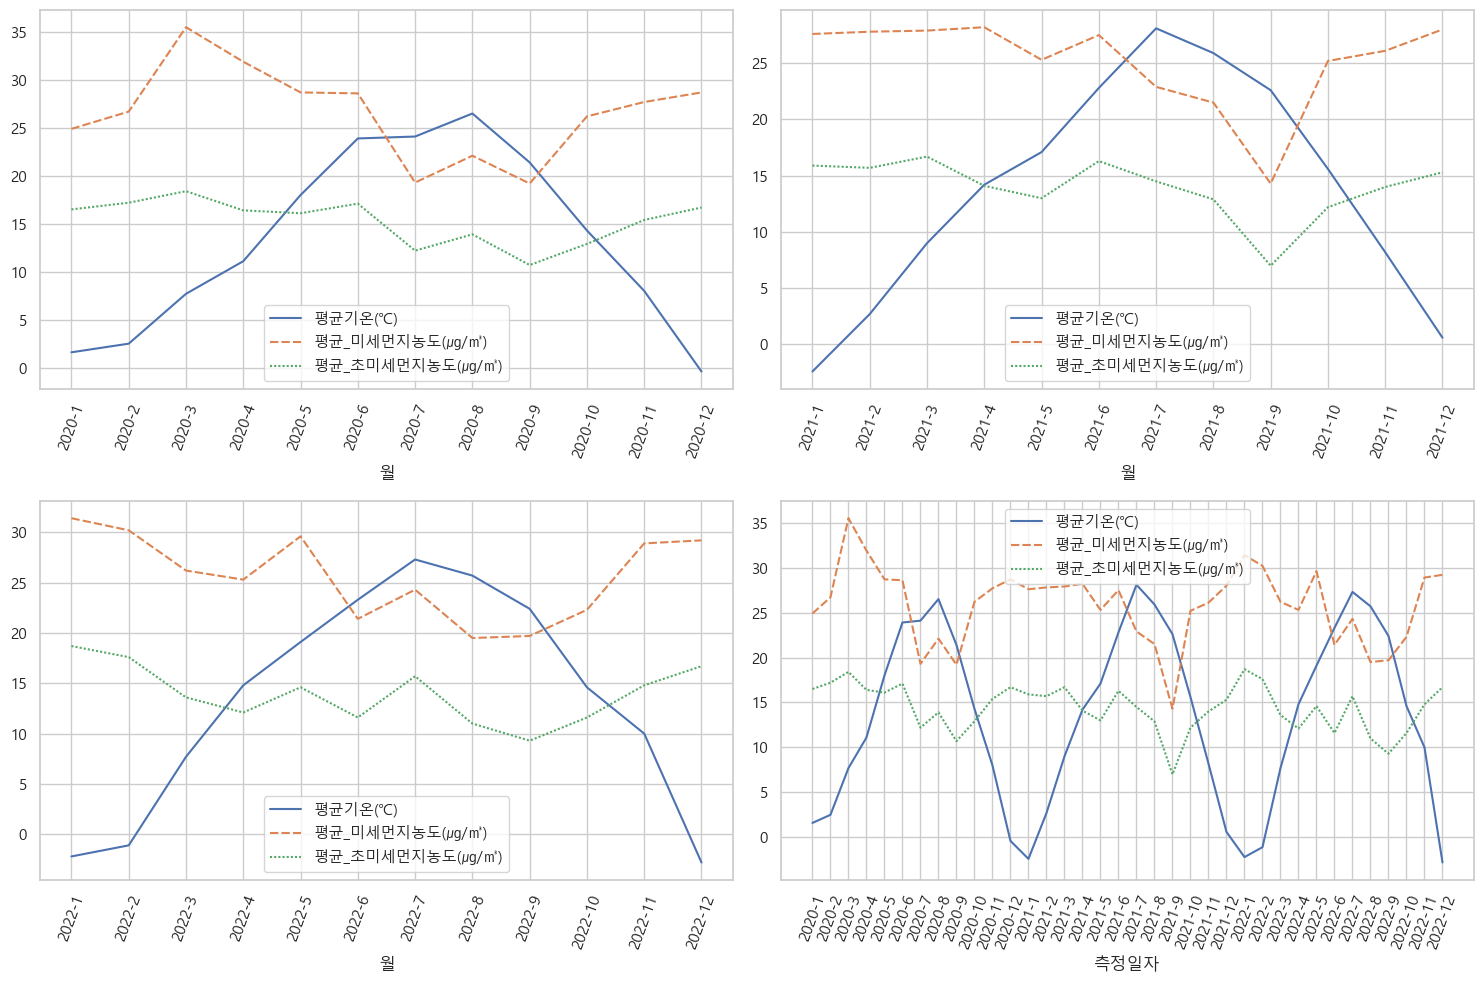

In [179]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.lineplot(seoul_2020)
plt.xticks(rotation=70)
plt.subplot(2, 2, 2)
sns.lineplot(seoul_2021)
plt.xticks(rotation=70)
plt.subplot(2, 2, 3)
sns.lineplot(seoul_2022)
plt.xticks(rotation=70)
plt.subplot(2, 2, 4)
sns.lineplot(seoul_data)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()